# HR Data Analysis
    a.	Preprocess and clean if necessary.
    b.	Build a model predicting “attriction”. 
    c.	Remember to comment your code and give rationales for models, algorithms, and approaches. 


## Import Packages

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load data

In [4]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [6]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences              1               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1      Y       No                 23                  4                         4             80                 1                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other              1               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Y      Yes                 15                  3                         2             80                 0                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences              1               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Y      Yes                 11                  3                         3             80                 0                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical              1               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9      Y       No                 12                  3                         4             80                 1                  6                      3                3               2                   2                        2                     2

## Exploratory Data Analysis(EDA)



### Check missing values and shape
Normally we need to clean the samples, i,e, impute missing values but in this case the data is pretty clean with no missing values. We also check the shape to make sure it matches the meta data info in the document. 

In [14]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None, (1470, 35))

### Check Loan Status ratio
The samples are balanced so we can use "Accuracy" metric to measure the performance of the model

<AxesSubplot:>

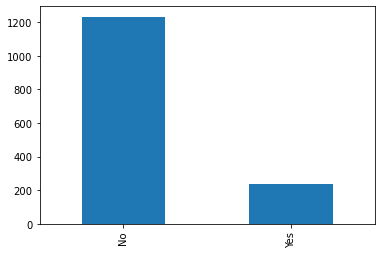

In [8]:

df['Attrition'].value_counts().plot(kind='bar')

### Describe the data

Categorical features/Dimensions 

In [45]:
cat_cols=df.select_dtypes(object).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

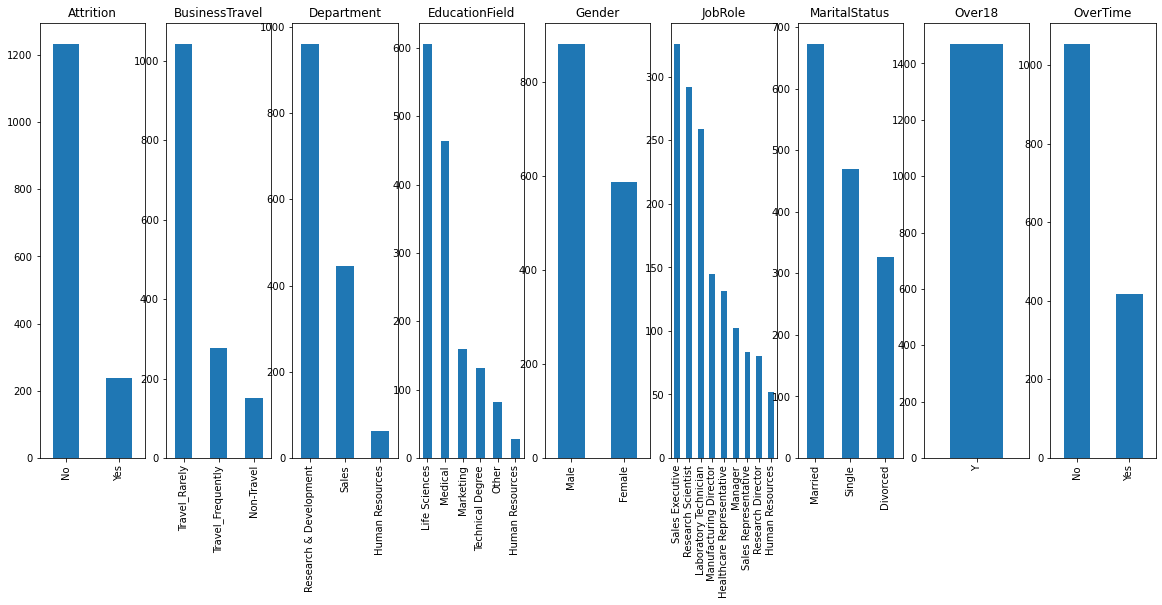

In [46]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
# fig, ax = plt.subplots(1, len(categorical_features))
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],figsize=(20,8),rot=90,fontsize=10).set_title(categorical_feature)
fig.show()

Numeric data

#### Histogram
Histogram groups numeric data into bins, displaying the bins as segmented columns and summarize the distribution of a univariate data set. 

In [16]:

num_cols=df.select_dtypes('number').drop(['EmployeeNumber'],axis=1).columns.tolist()
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


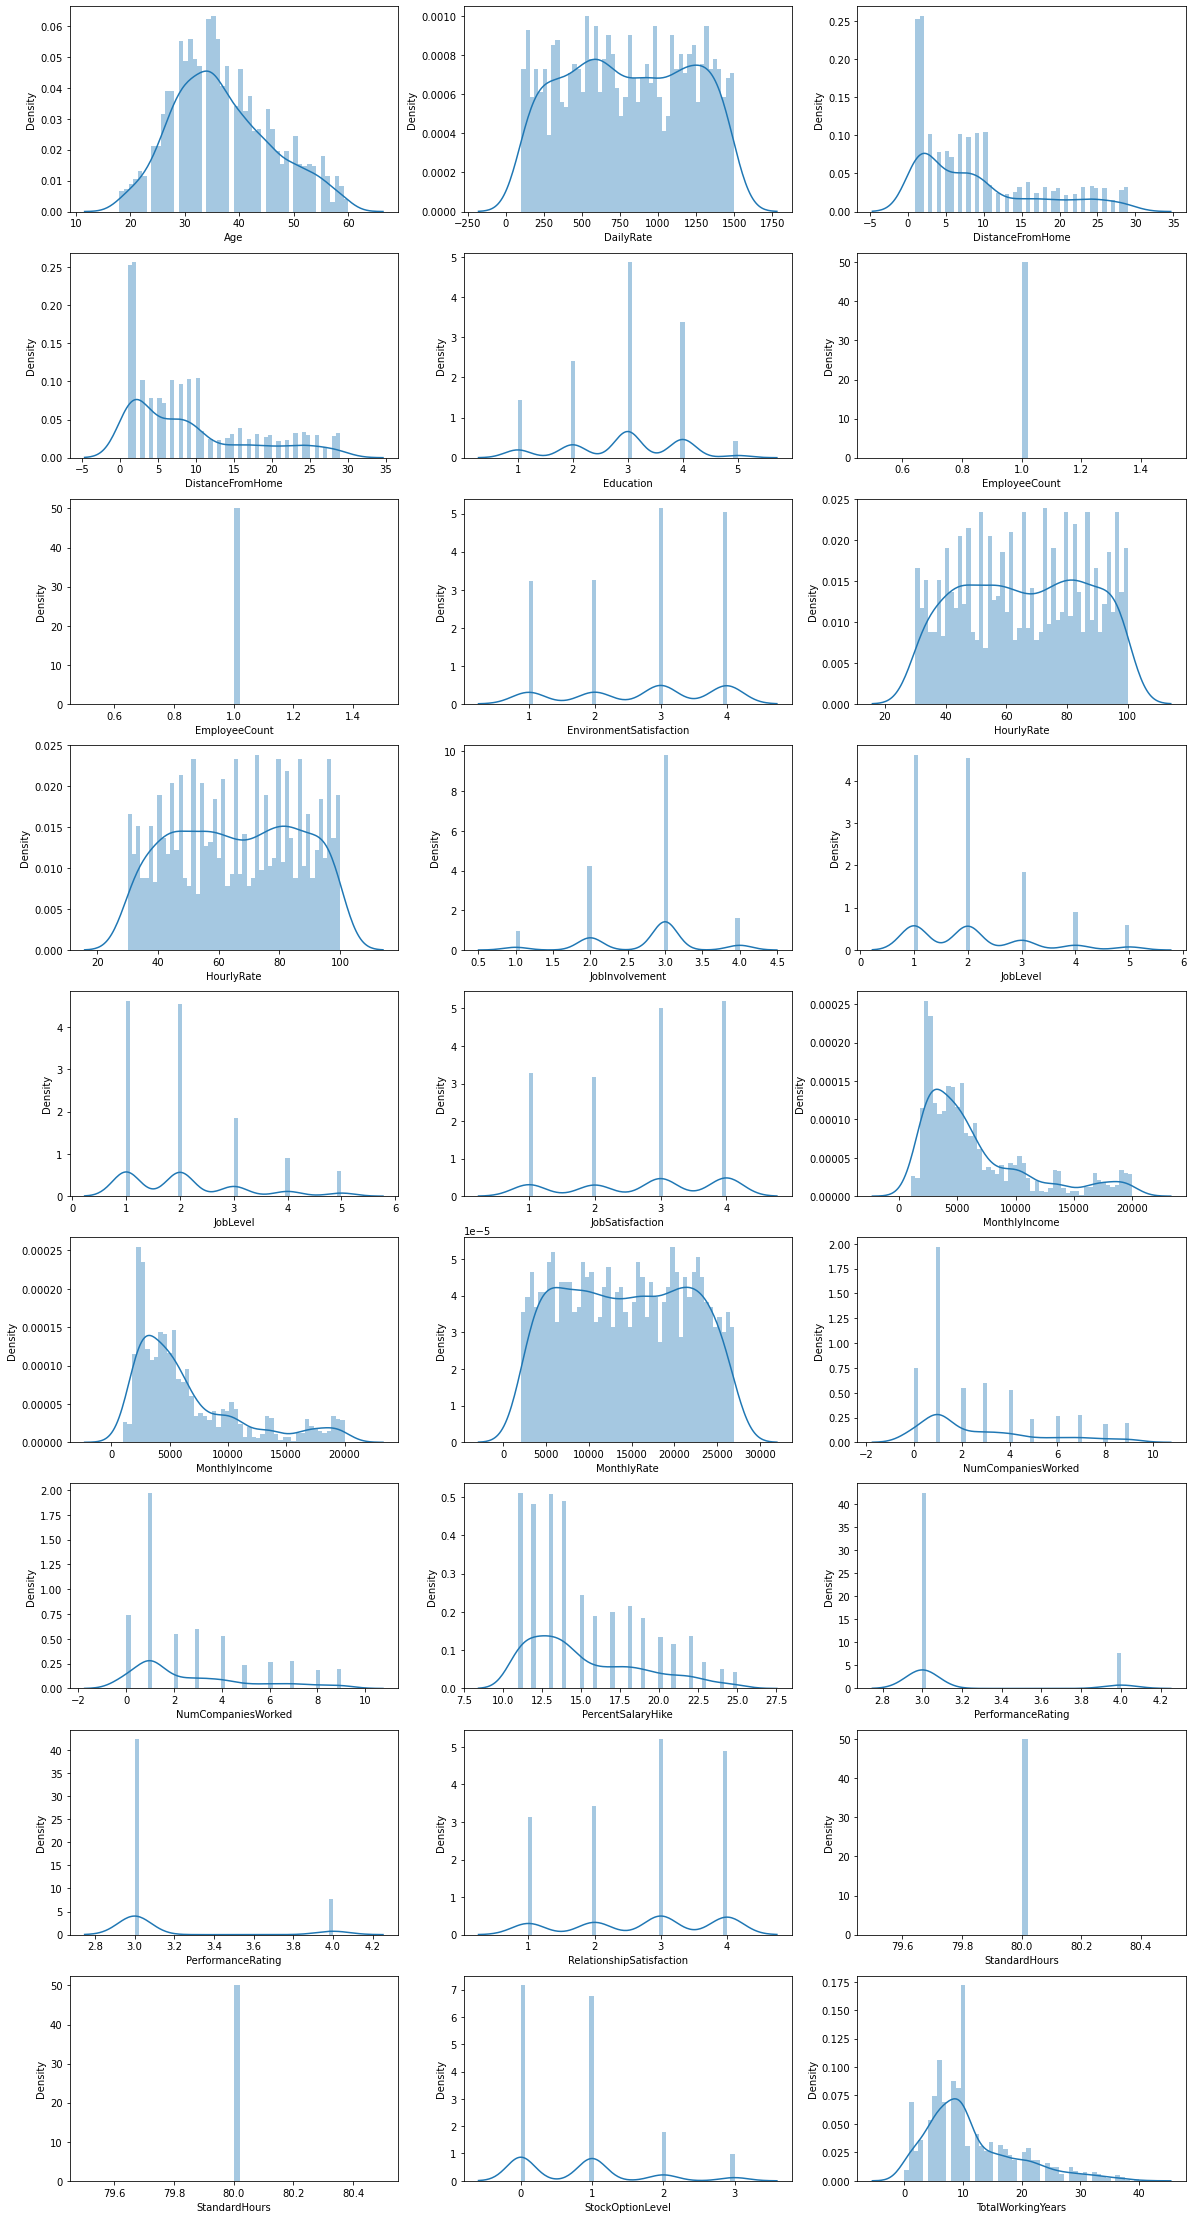

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9, 3, figsize=(20, 40))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

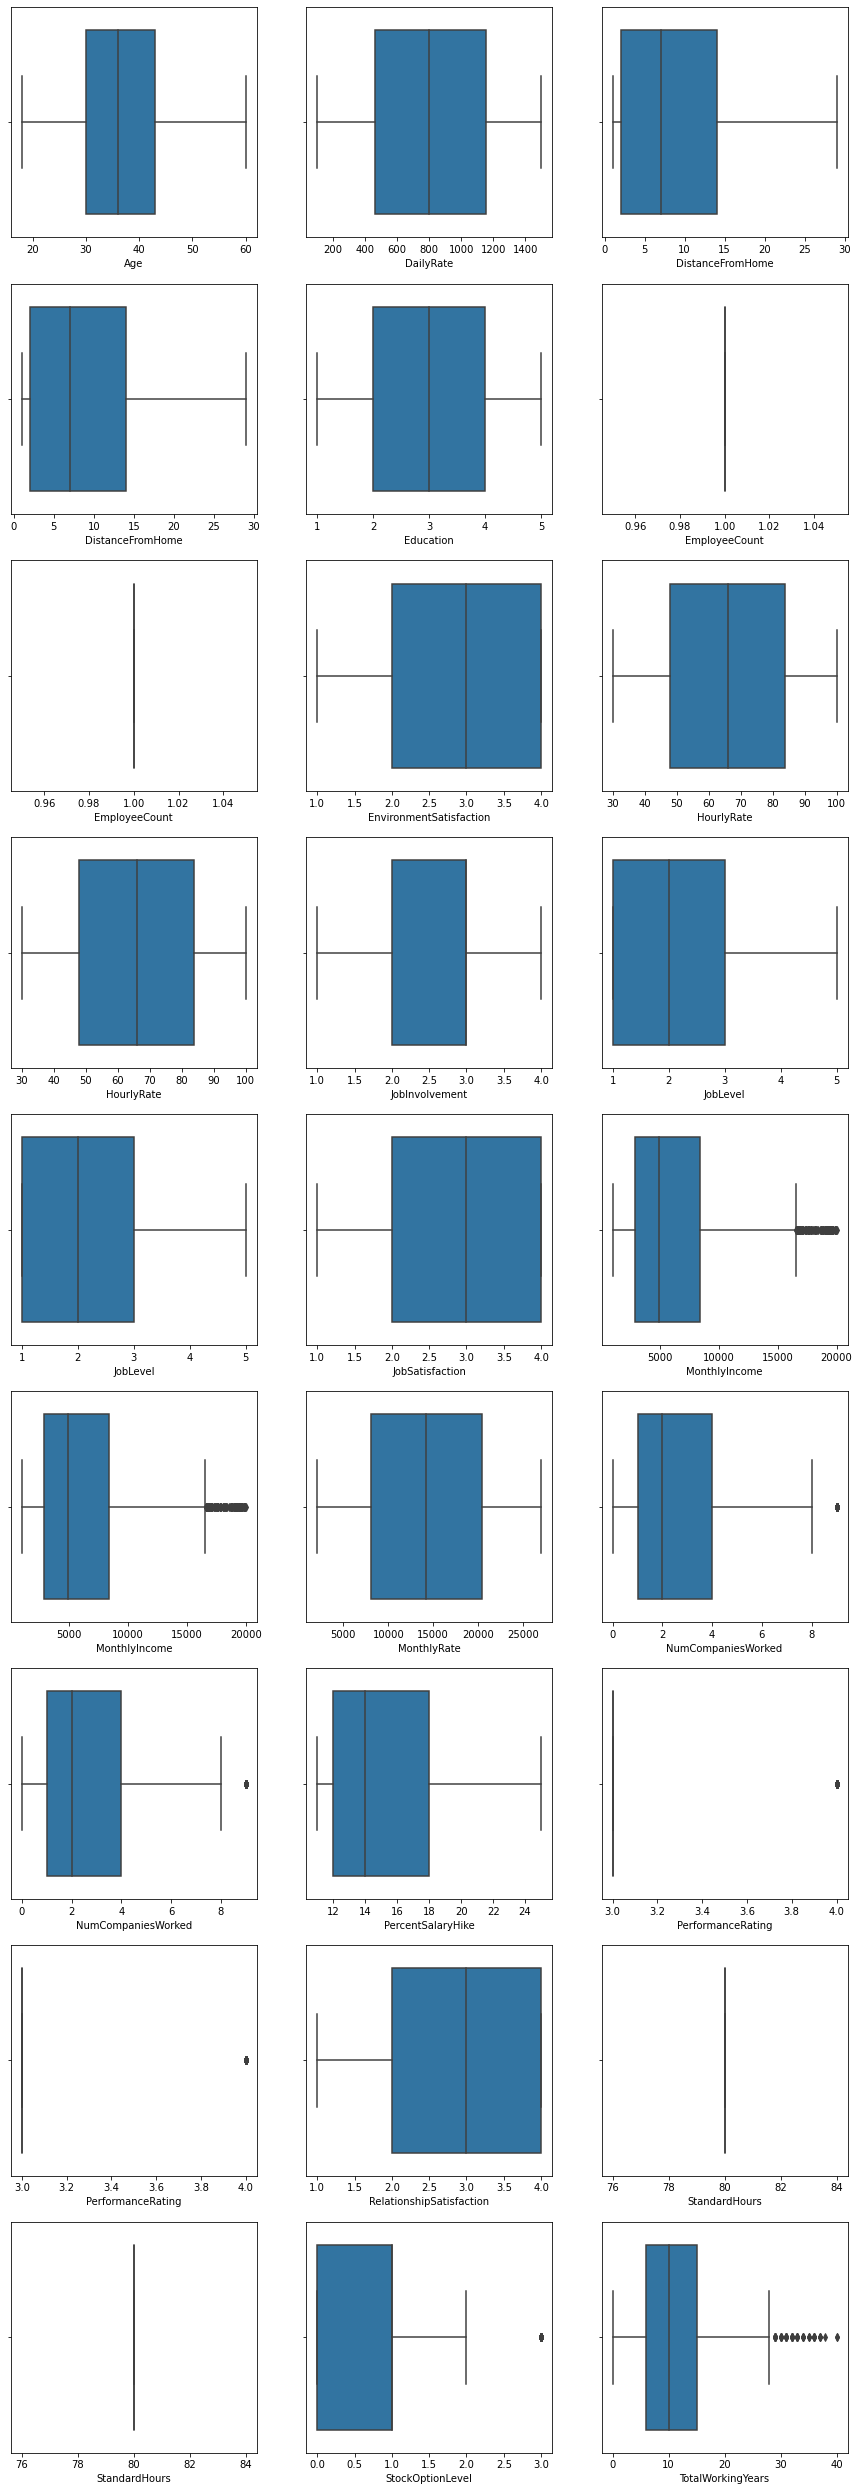

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(9, 3, figsize=(15, 45))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v')

In [22]:
df.describe()
# from the "max" row we can see feature PARA_A, PARA_B,Money_Value,History have some potential outliers. 

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.923810   802.485714          9.192517     2.912925            1.0     1024.865306                 2.721769    65.891156        2.729932     2.063946         2.728571    6502.931293  14313.103401            2.693197          15.209524           3.153741                  2.712245           80.0          0.793878          11.279592               2.799320         2.761224        7.008163            4.229252                 2.187755              4.123129
std       9.135373   403.509100          8.106864     1.024165            0.0      602.024335                 1.093082    20.329428        0.711561     1.106940         1.102846    4707.956783   7117.786044            2.498009           3.659938           0.360824                  1.081209            0.0          0.852077           7.780782               1.289271         0.706476        6.126525            3.623137                 3.222430              3.568136
min      18.000000   102.000000          1.000000     1.000000            1.0        1.000000                 1.000000    30.000000        1.000000     1.000000         1.000000    1009.000000   2094.000000            0.000000          11.000000           3.000000                  1.000000           80.0          0.000000           0.000000               0.000000         1.000000        0.000000            0.000000                 0.000000              0.000000
25%      30.000000   465.000000          2.000000     2.000000            1.0      491.250000                 2.000000    48.000000        2.000000     1.000000         2.000000    2911.000000   8047.000000            1.000000          12.000000           3.000000                  2.000000           80.0          0.000000           6.000000               2.000000         2.000000        3.000000            2.000000                 0.000000              2.000000
50%      36.000000   802.000000          7.000000     3.000000            1.0     1020.500000                 3.000000    66.000000        3.000000     2.000000         3.000000    4919.000000  14235.500000            2.000000          14.000000           3.000000                  3.000000           80.0          1.000000          10.000000               3.000000         3.000000        5.000000            3.000000                 1.000000              3.000000
75%      43.000000  1157.000000         14.000000     4.000000            1.0     1555.750000                 4.000000    83.750000        3.000000     3.000000         4.000000    8379.000000  20461.500000            4.000000          18.000000           3.000000                  4.000000           80.0          1.000000          15.000000               3.000000         3.000000        9.000000            7.000000                 3.000000              7.000000
max      60.000000  1499.000000         29.000000     5.000000            1.0     2068.000000                 4.000000   100.000000        4.000000     5.000000         4.000000   19999.000000  26999.000000            9.000000          25.000000           4.000000                  4.000

### Clip, i.e. assigns values outside boundary to boundary values, the data to deal with outliers. 
 Outliers may distort how we see the data. They contain information too so it's a tradeoff; we lose some info but gain a better big picture of the data.

In [23]:
# here we use quantile 0.01 as lower limit and 0.99 upper.
df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.918810   802.482993          9.192517     2.912925            1.0     1024.865306                 2.721769    65.891156        2.729932     2.063946         2.728571    6503.407177  14312.602483            2.693197          15.209524           3.153741                  2.712245           80.0          0.793878          11.268707               2.799320         2.761224        6.980272            4.214966                 2.178912              4.102721
std       9.099146   403.260237          8.106864     1.024165            0.0      602.024335                 1.093082    20.329428        0.711561     1.106940         1.102846    4700.530849   7112.052810            2.498009           3.659938           0.360824                  1.081209            0.0          0.852077           7.710507               1.289271         0.706476        6.004901            3.576459                 3.188426              3.503717
min      19.000000   117.000000          1.000000     1.000000            1.0        1.000000                 1.000000    30.000000        1.000000     1.000000         1.000000    1382.460000   2325.070000            0.000000          11.000000           3.000000                  1.000000           80.0          0.000000           1.000000               0.000000         1.000000        0.000000            0.000000                 0.000000              0.000000
25%      30.000000   465.000000          2.000000     2.000000            1.0      491.250000                 2.000000    48.000000        2.000000     1.000000         2.000000    2911.000000   8047.000000            1.000000          12.000000           3.000000                  2.000000           80.0          0.000000           6.000000               2.000000         2.000000        3.000000            2.000000                 0.000000              2.000000
50%      36.000000   802.000000          7.000000     3.000000            1.0     1020.500000                 3.000000    66.000000        3.000000     2.000000         3.000000    4919.000000  14235.500000            2.000000          14.000000           3.000000                  3.000000           80.0          1.000000          10.000000               3.000000         3.000000        5.000000            3.000000                 1.000000              3.000000
75%      43.000000  1157.000000         14.000000     4.000000            1.0     1555.750000                 4.000000    83.750000        3.000000     3.000000         4.000000    8379.000000  20461.500000            4.000000          18.000000           3.000000                  4.000000           80.0          1.000000          15.000000               3.000000         3.000000        9.000000            7.000000                 3.000000              7.000000
max      58.310000  1485.000000         29.000000     5.000000            1.0     2068.000000                 4.000000   100.000000        4.000000     5.000000         4.000000   19626.310000  26704.240000            9.000000          25.000000           4.000000                  4.000

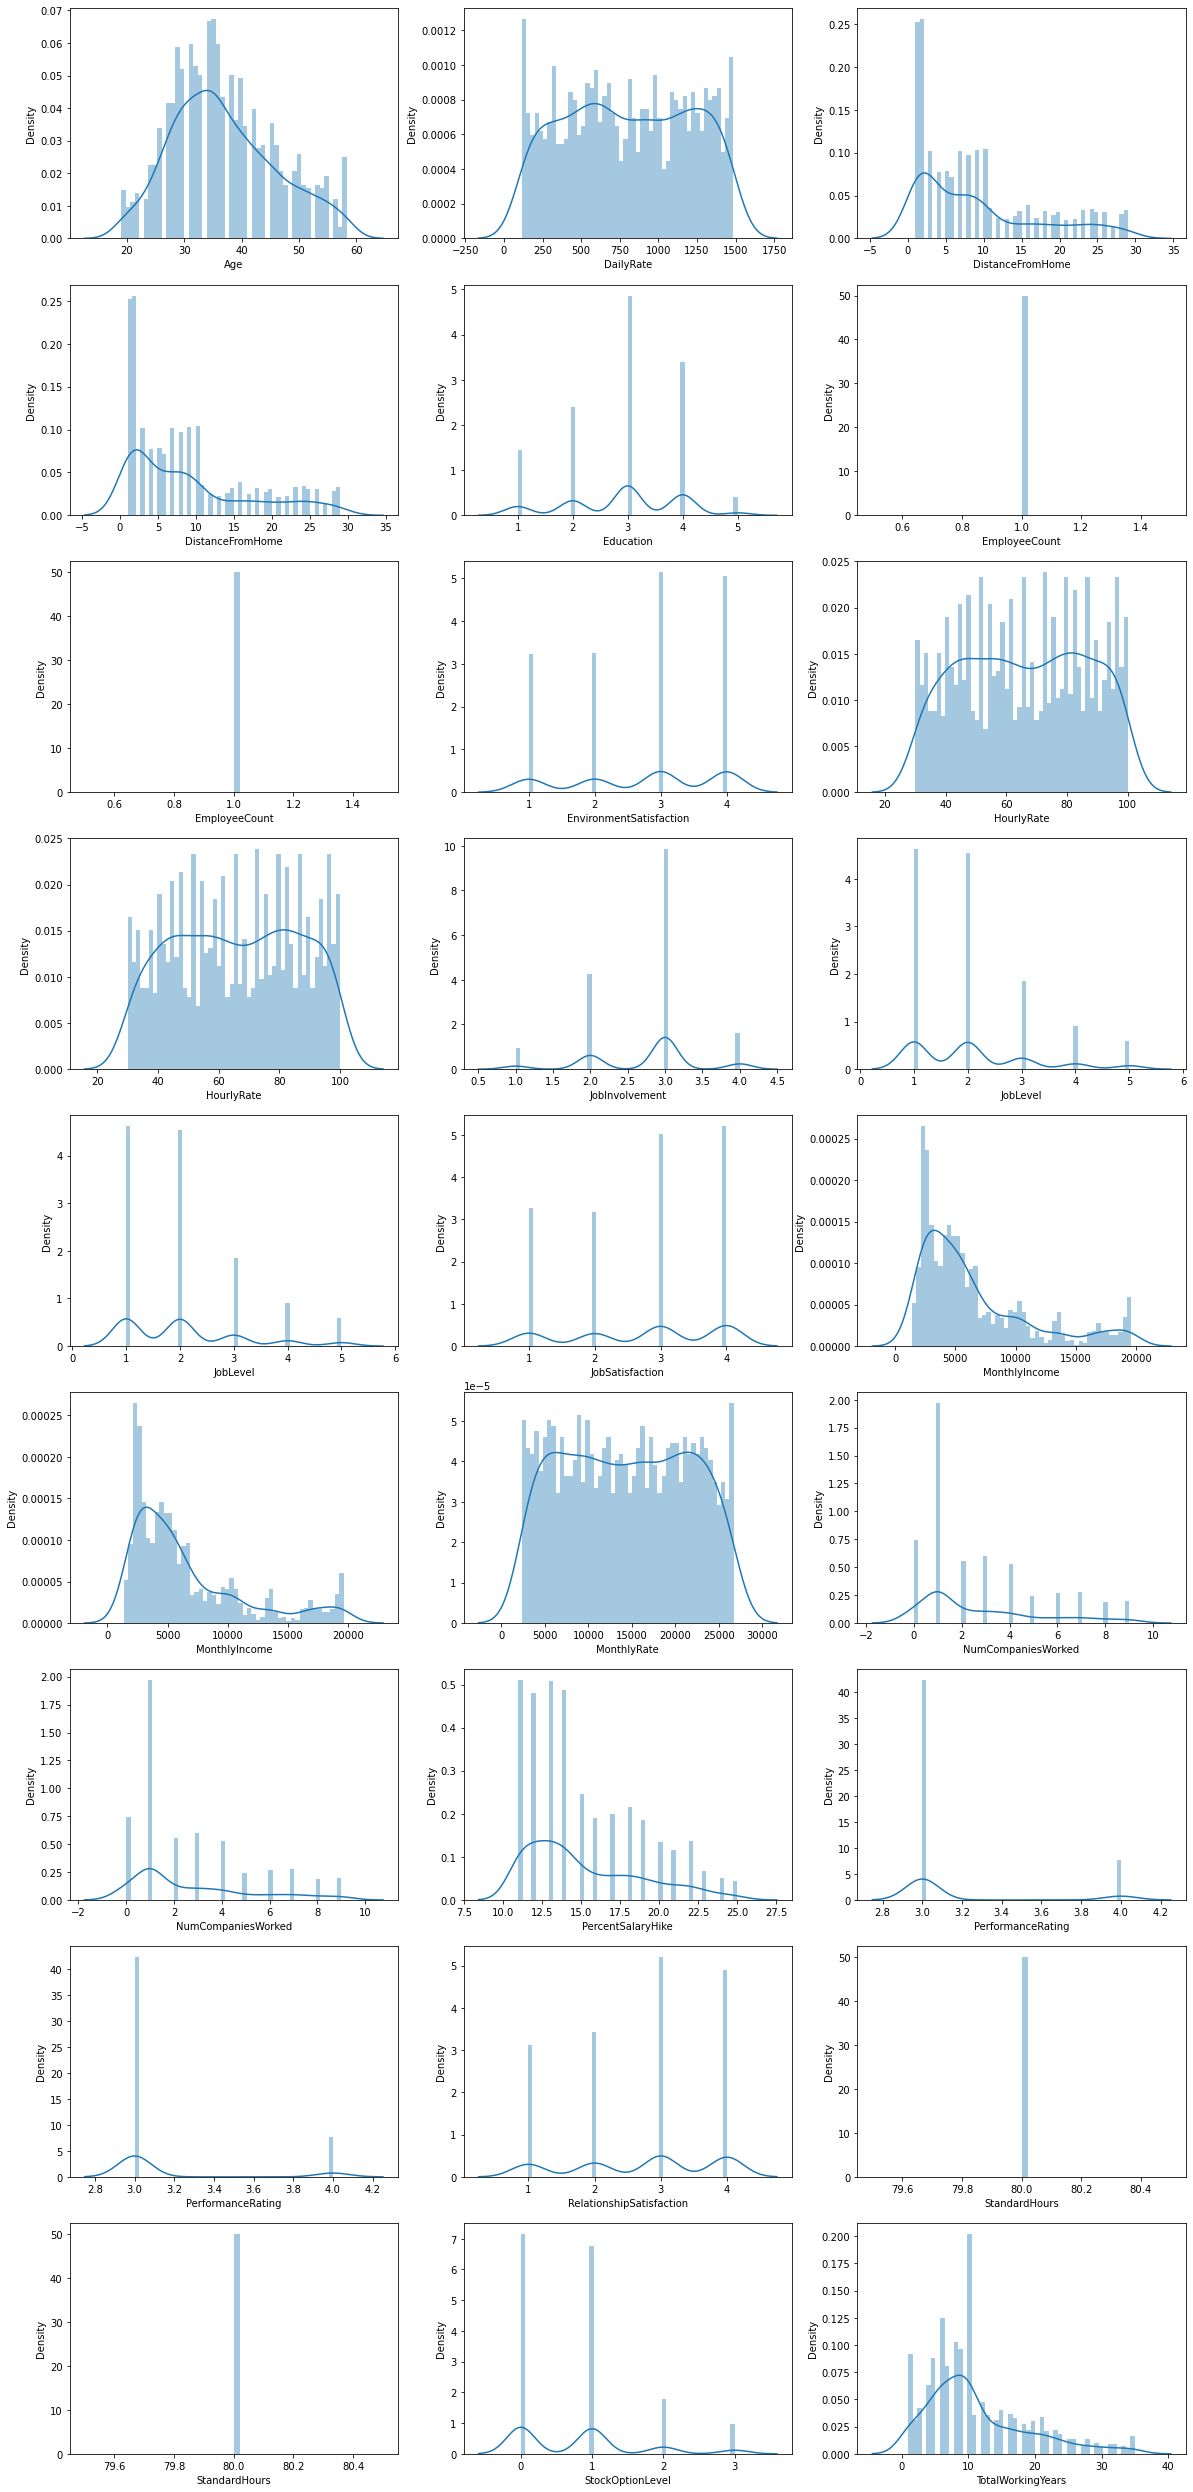

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9, 3, figsize=(20, 45))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

### Boxplot the data
Boxplot shows the shape of the distribution, its central value, and its variability

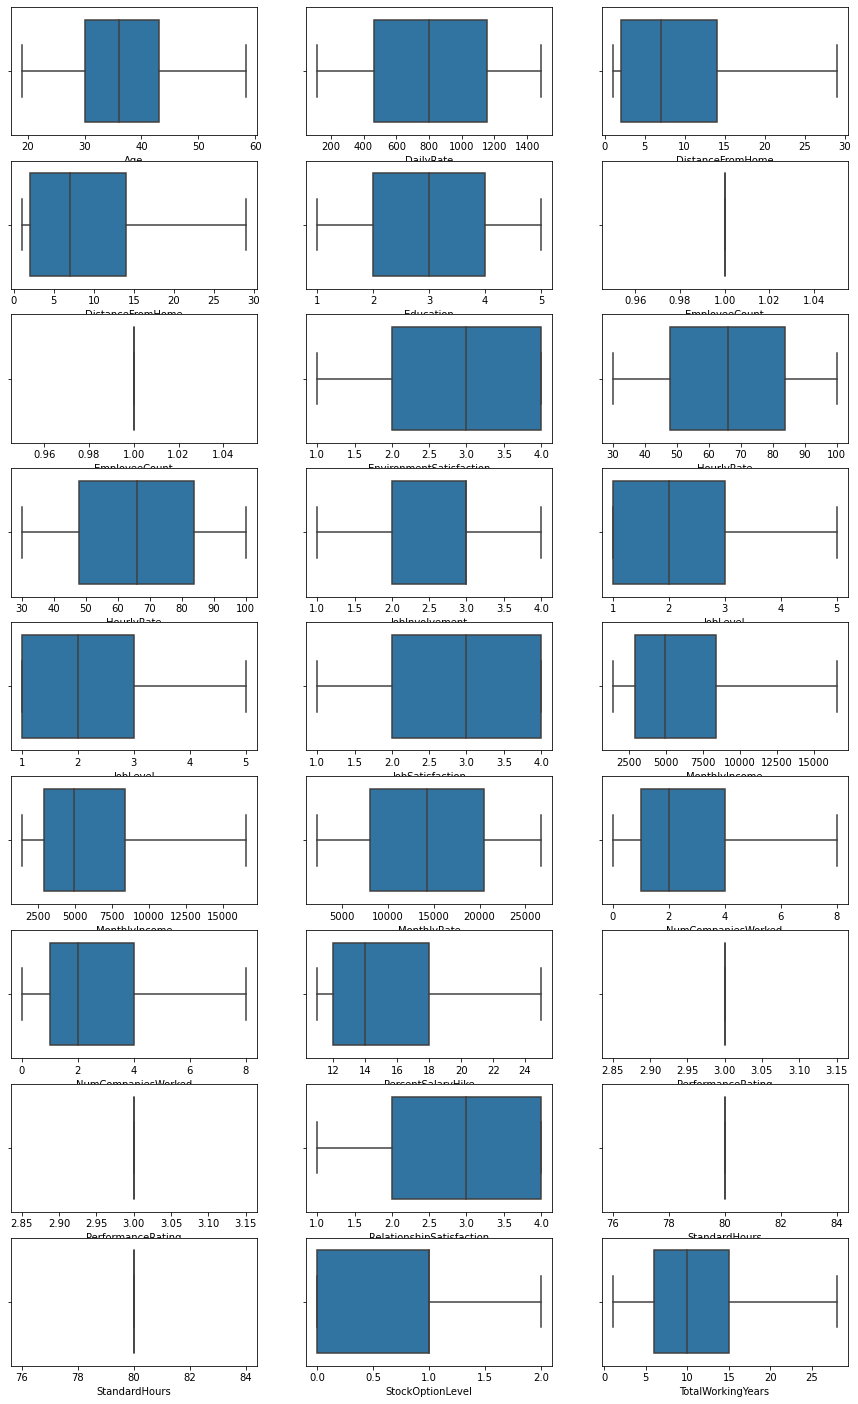

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(9, 3, figsize=(15, 25))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)

#### Explain the Boxplots:
The boxplots tell similar story as the Histograms. None of the distributions seem normal.

### Correlation heatmap
Correlation heatmap allows us to see relations between features/attributes. The higher the absolute coefficient, the stronger the correlation is. 

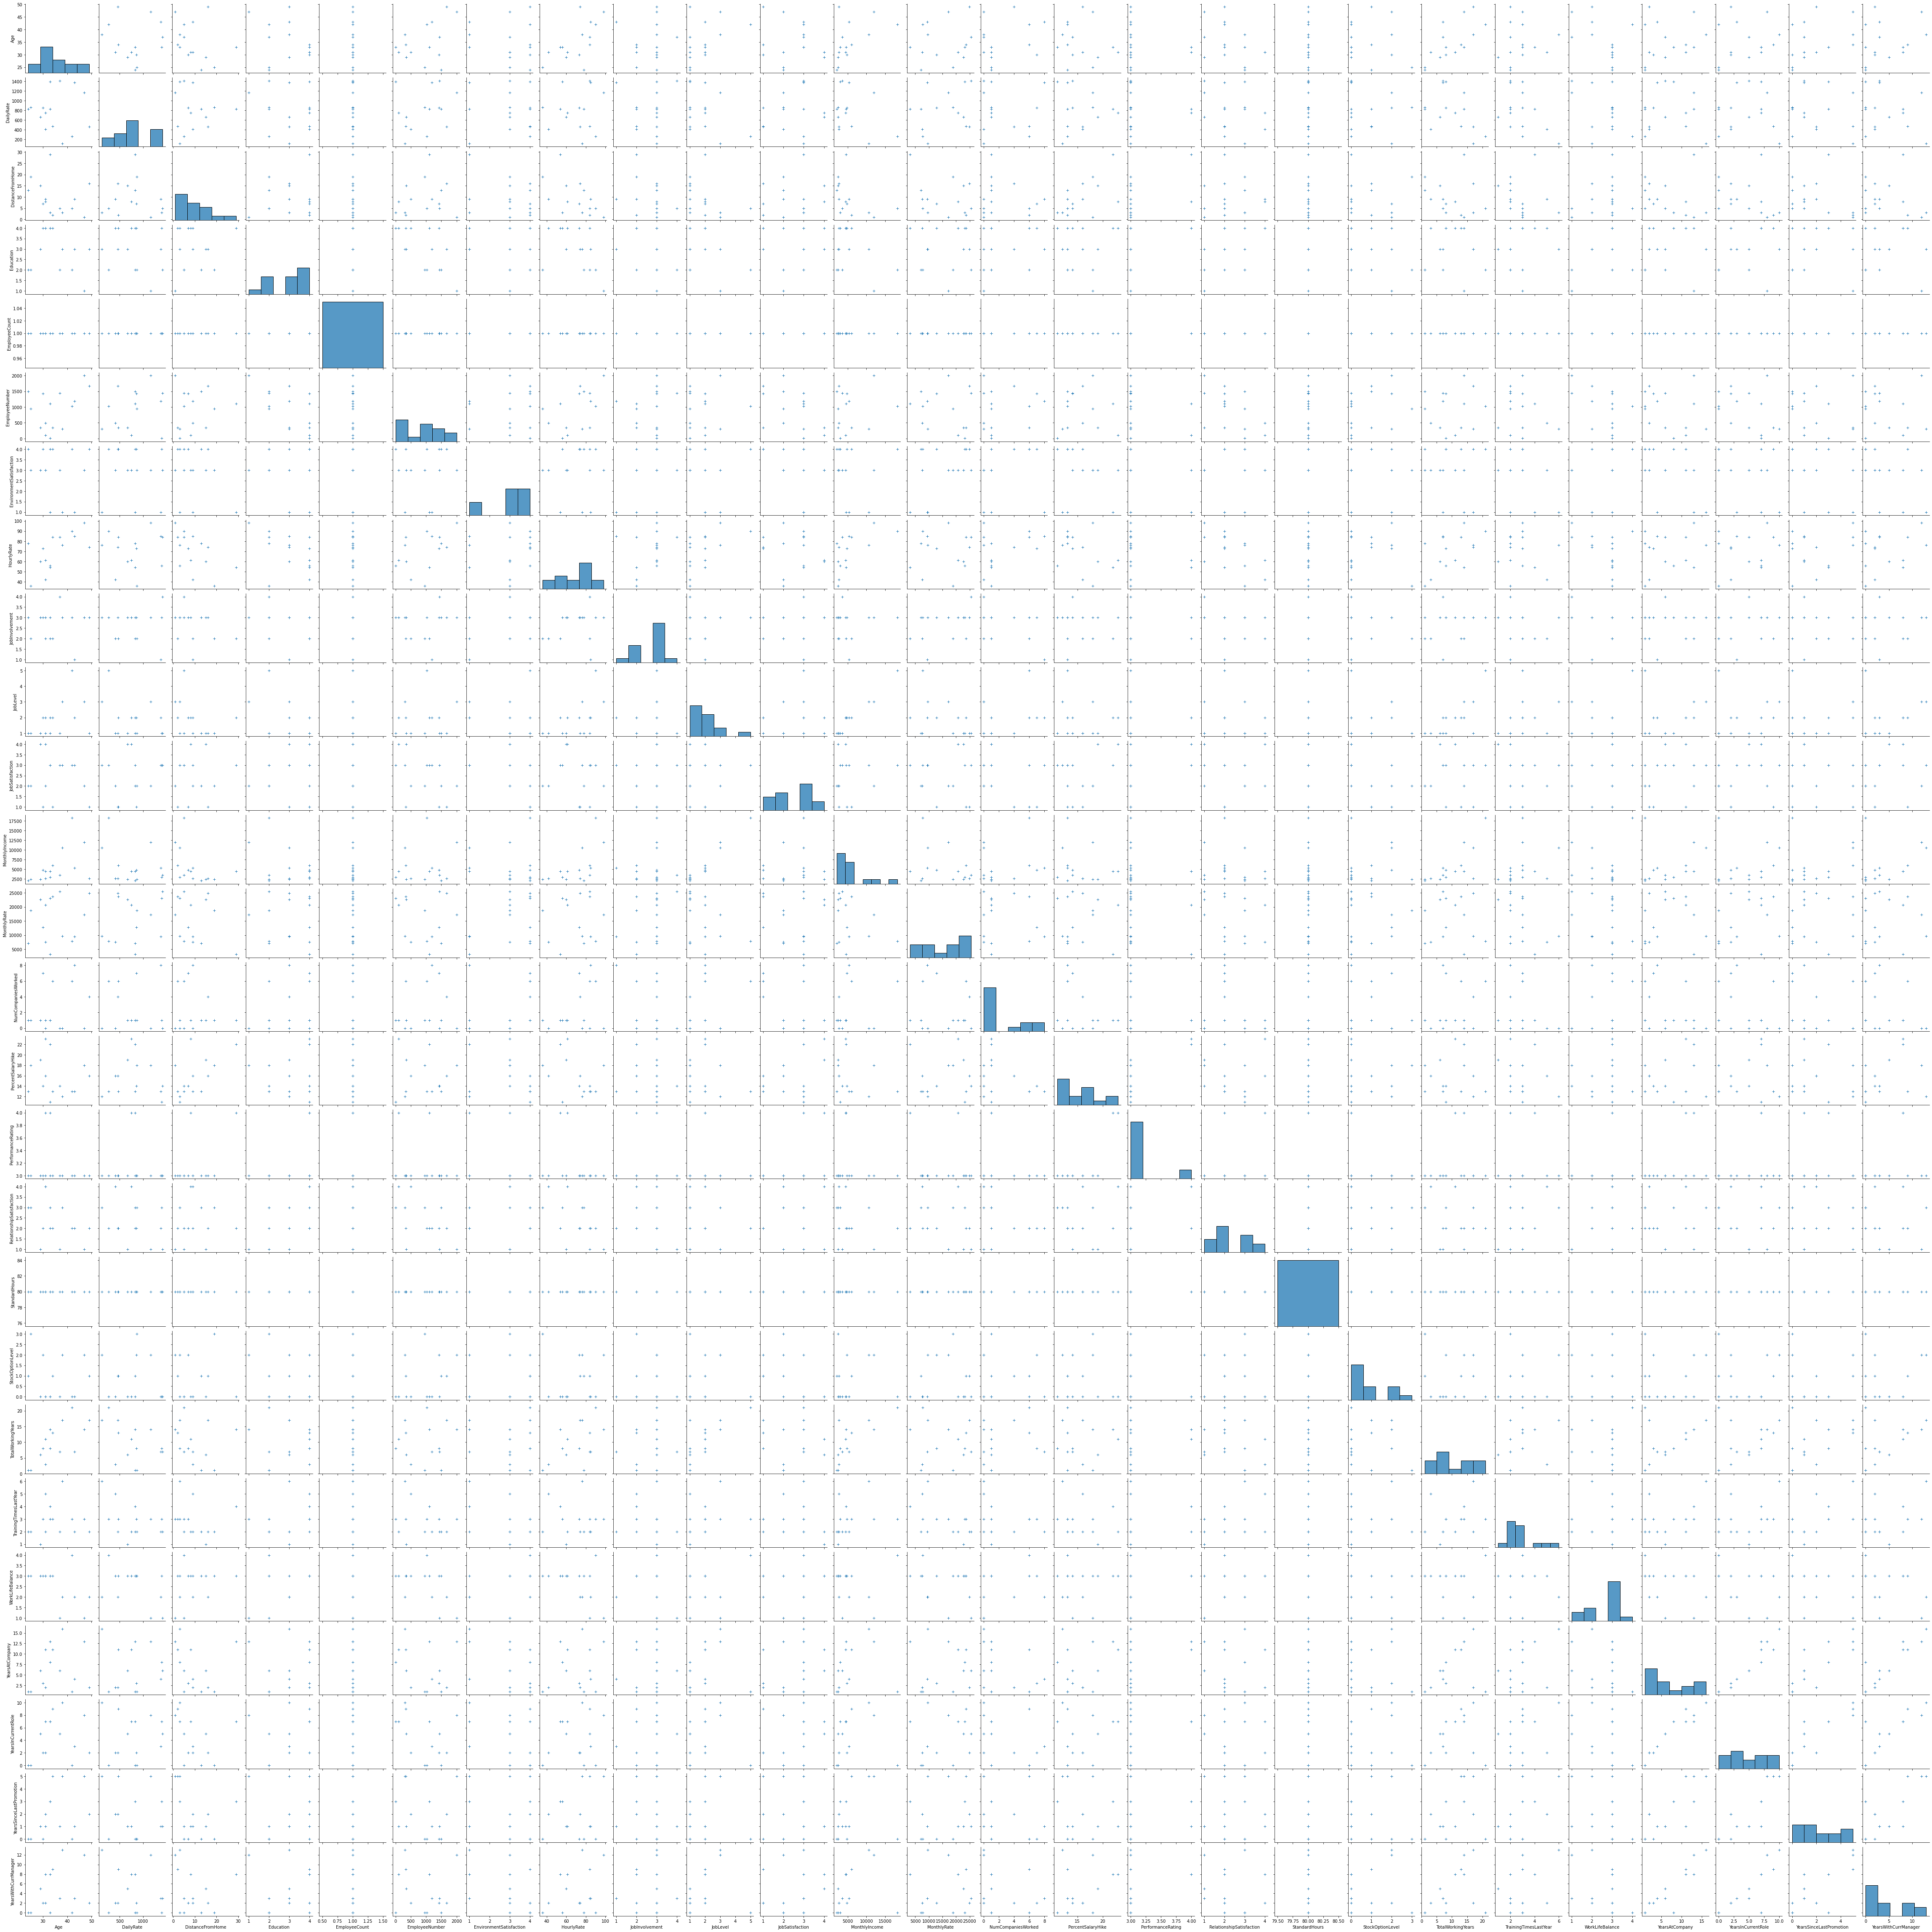

In [26]:
# import seaborn as sns
# df=df.query('`Loan ID`.notnull()', engine='python')
# sns.pairplot(df.sample(frac=0.01, replace=True).reset_index(drop=True),plot_kws=dict(marker="+", linewidth=1))

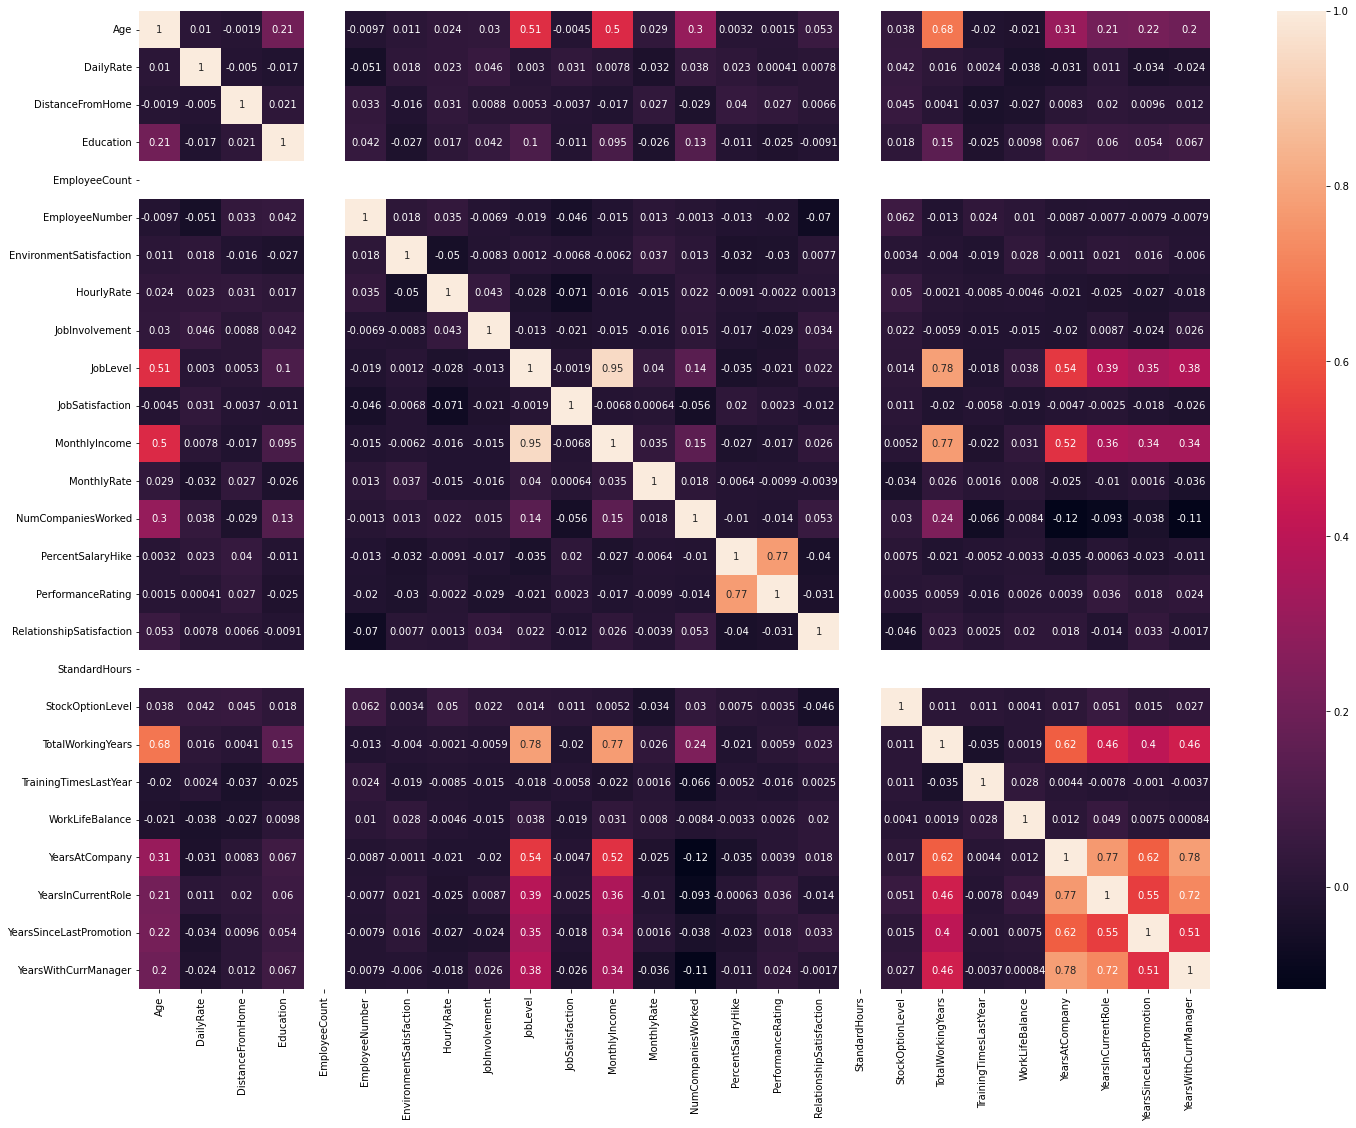

In [29]:

# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)
corrMatrix = df.corr()
plt.figure(figsize = (24,18))
ax=(sns.heatmap(corrMatrix, annot=True))
plt.show()

Chi Square p value = 5.608614476449931e-06


Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

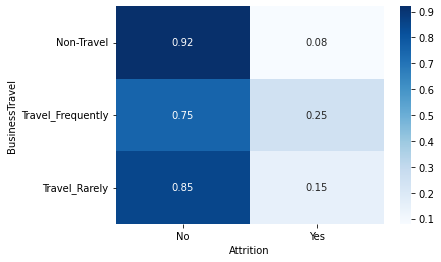

In [31]:
from scipy.stats import chisquare,chi2_contingency

v1=df['BusinessTravel']

v2=df['Attrition']
# g, p, dof, expctd=chi2_contingency(pd.crosstab(v1, v2))
print('Chi Square p value =' , chi2_contingency(pd.crosstab(v1, v2))[1])

display(pd.crosstab(v1, v2))
display(pd.crosstab(v1, v2,normalize='index'))
# sns.heatmap(pd.crosstab(v1, v2), annot=True)
sns.heatmap(pd.crosstab(v1, v2,normalize='index'), annot=True,cmap="Blues")


C:\Users\ABC\AppData\Local\Temp/ipykernel_14968/2279948629.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


<AxesSubplot:>

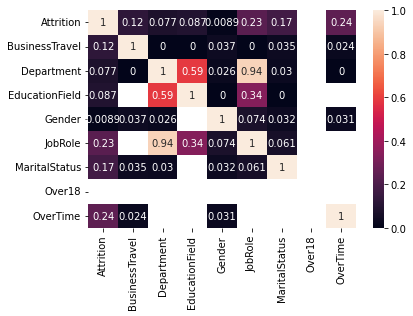

In [47]:
#import stats package
import scipy.stats as ss

#define the Cramér’s V function to get the association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# create the dataset with association coefficeints for heatmap
g=pd.DataFrame()
cols=cat_cols
for c1 in cols:
    l=[]
    f=[]
    d=pd.DataFrame()
    
    for c2 in cols:
        l.append(cramers_v(df[c1],df[c2]))
        f.append(c2) 
        d=pd.concat([d,pd.DataFrame(l,columns=[c1],index=f)]).drop_duplicates()
    g=pd.concat([g,d],axis=1)

sns.heatmap(g,annot=True)

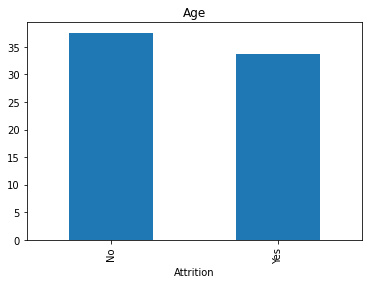

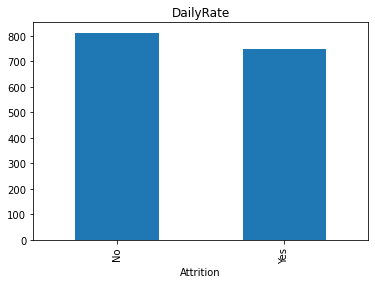

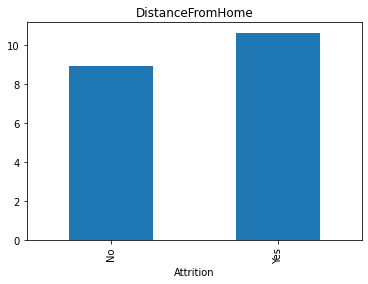

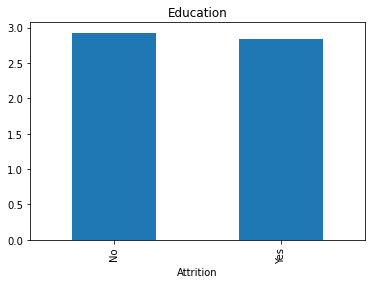

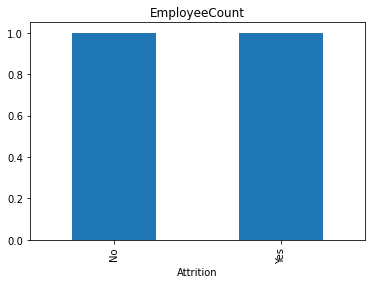

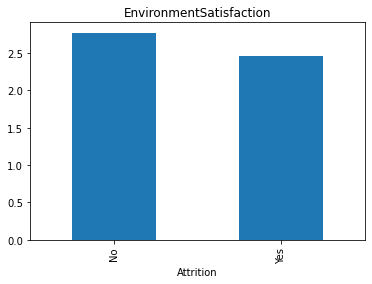

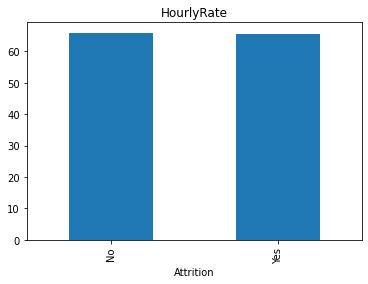

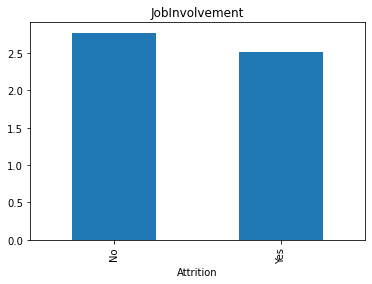

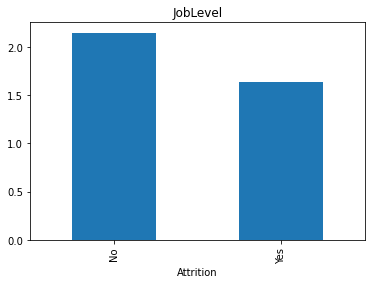

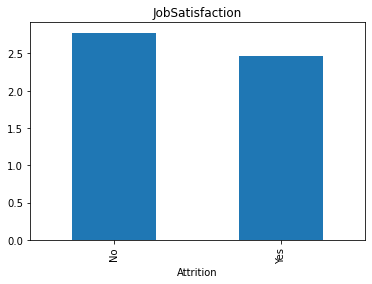

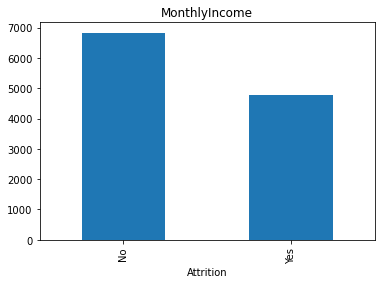

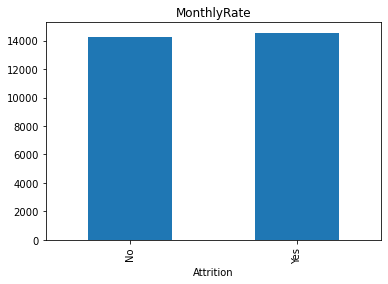

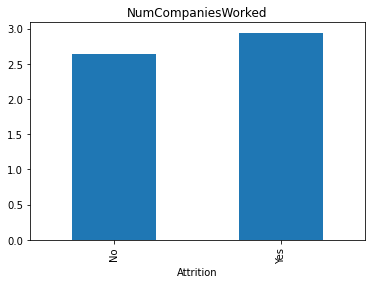

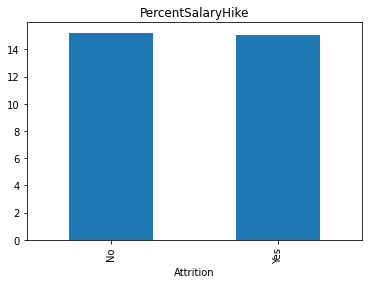

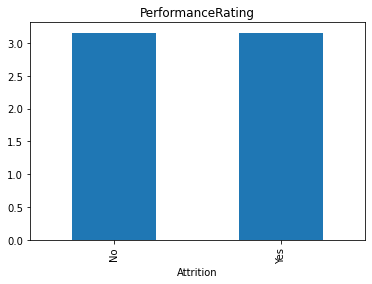

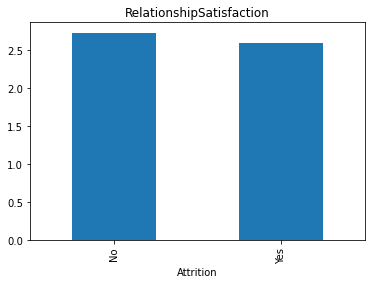

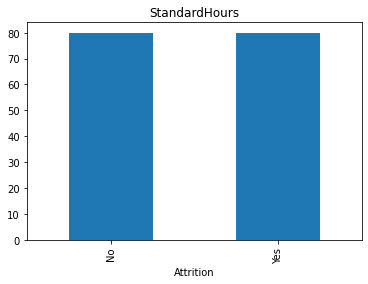

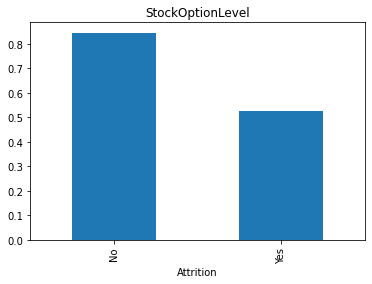

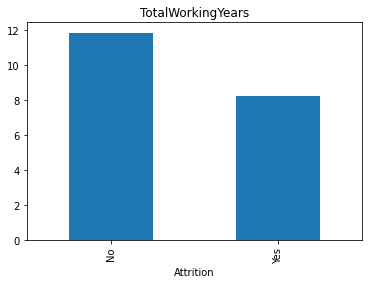

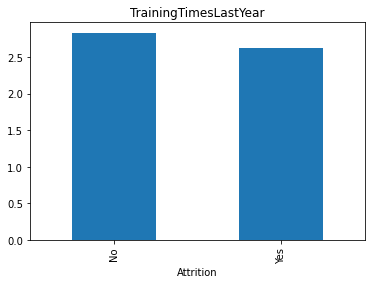

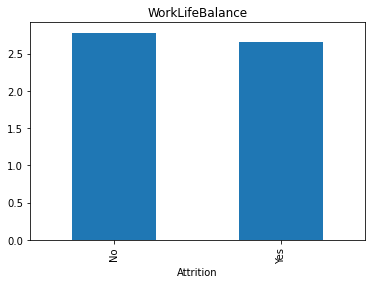

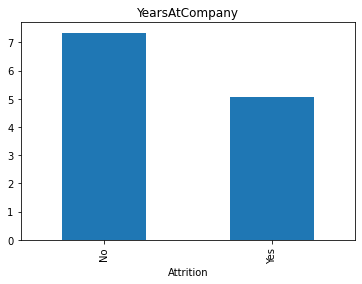

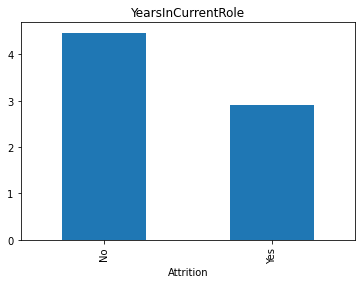

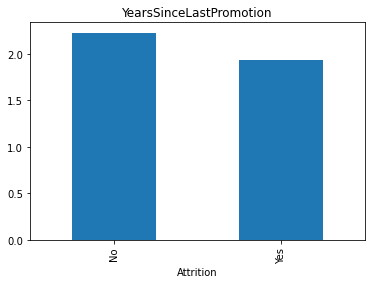

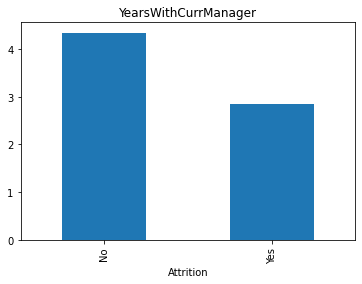

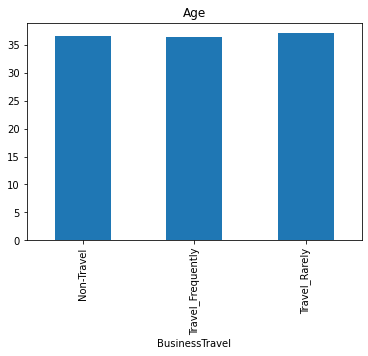

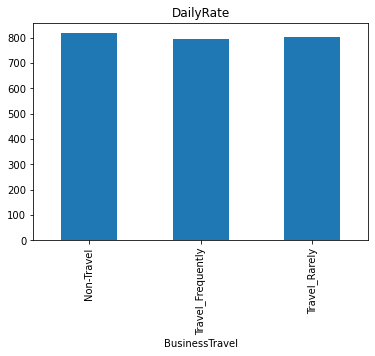

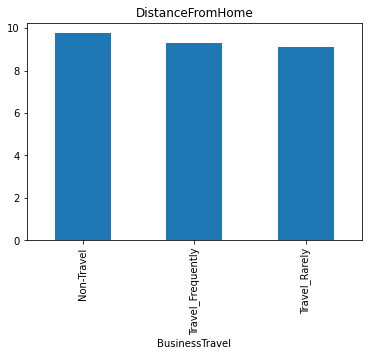

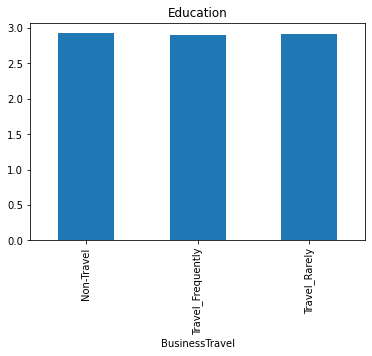

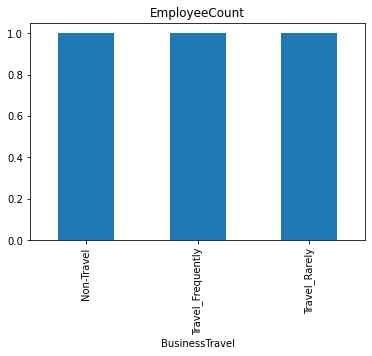

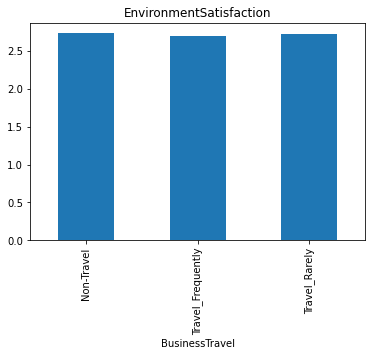

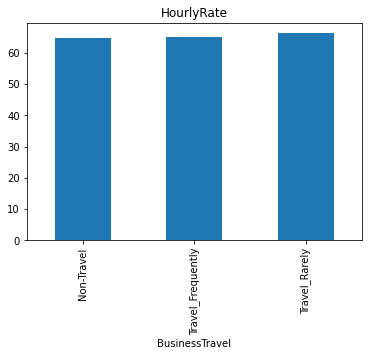

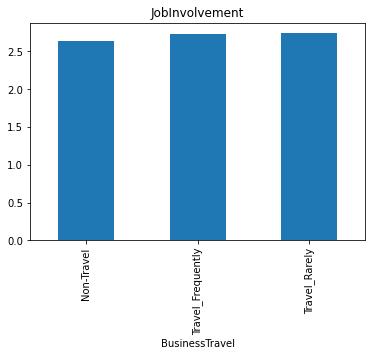

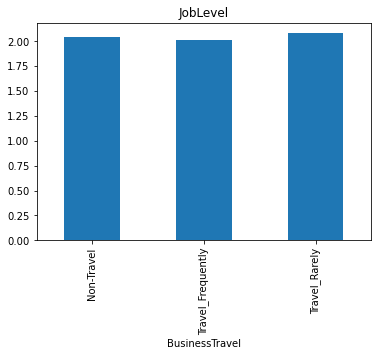

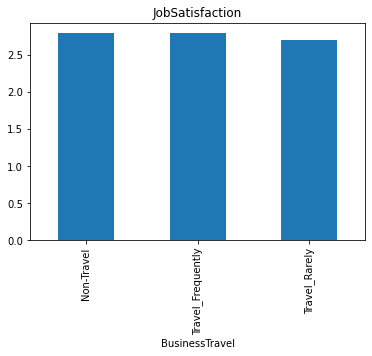

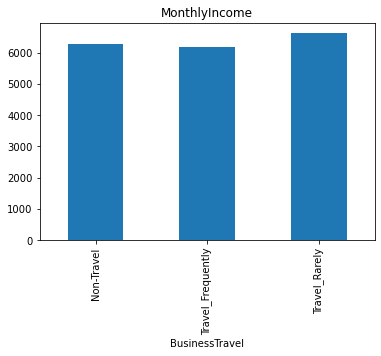

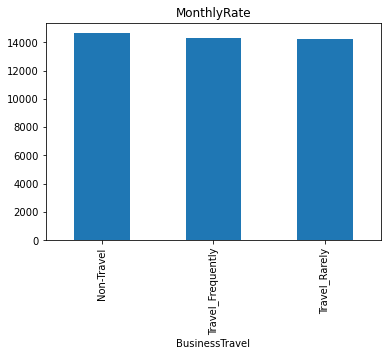

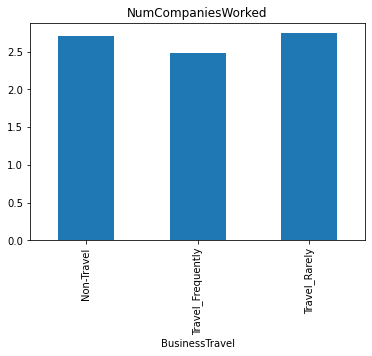

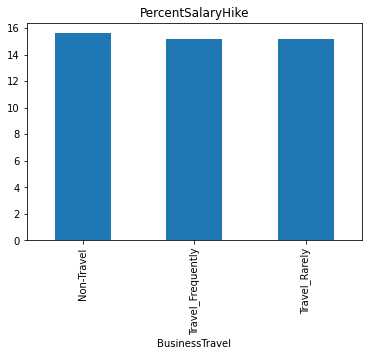

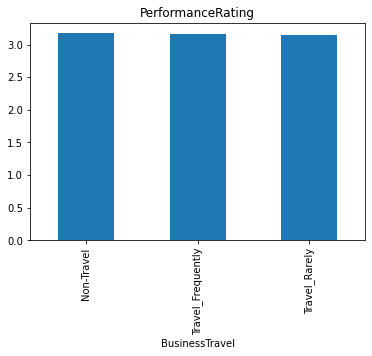

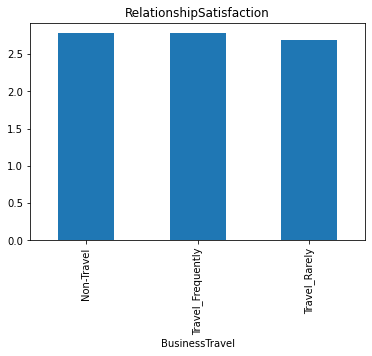

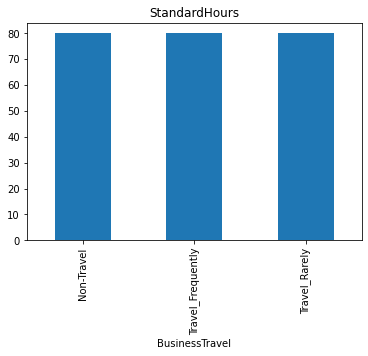

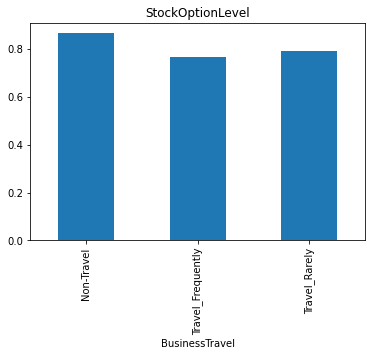

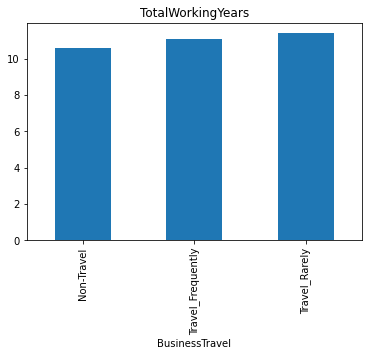

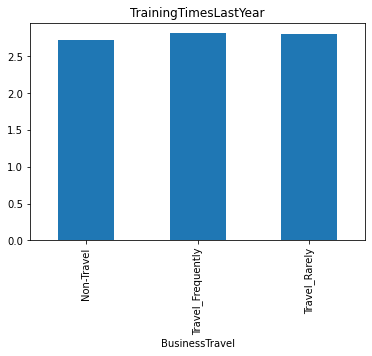

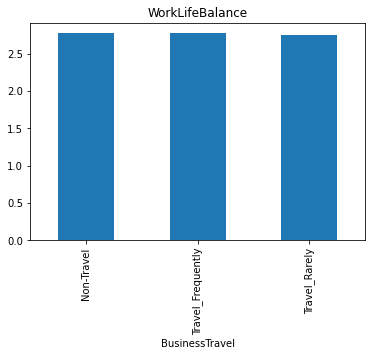

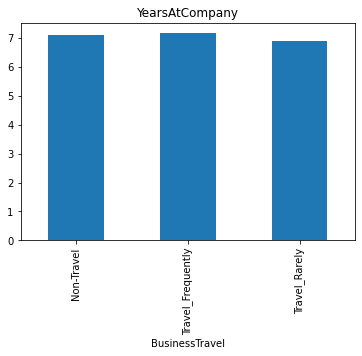

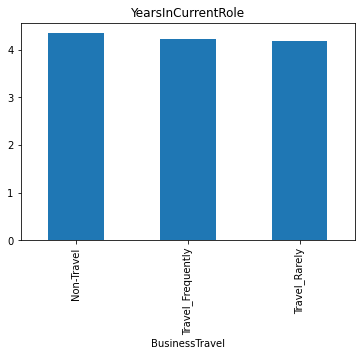

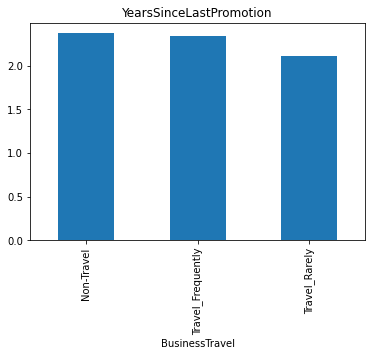

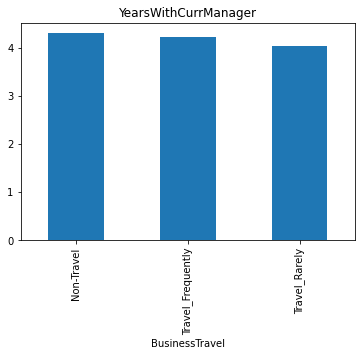

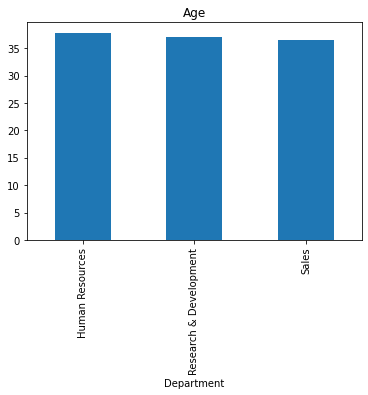

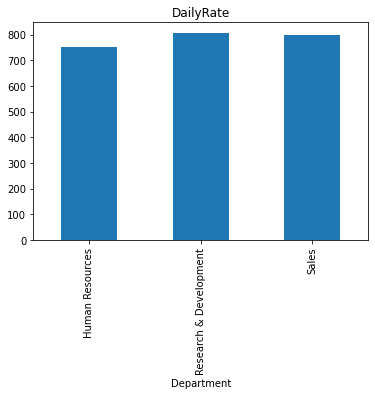

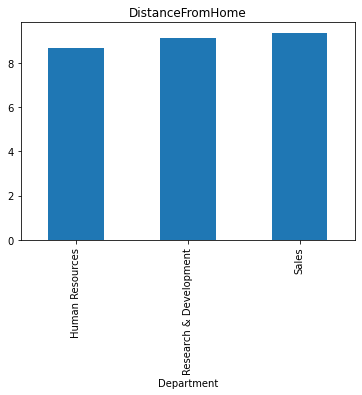

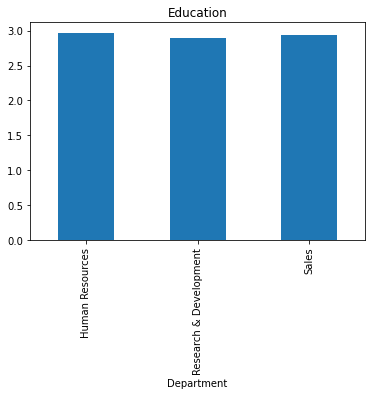

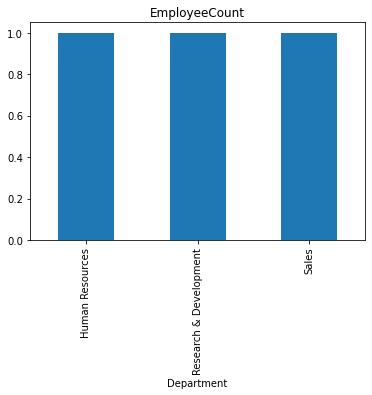

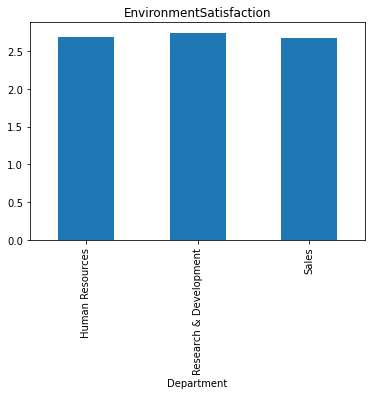

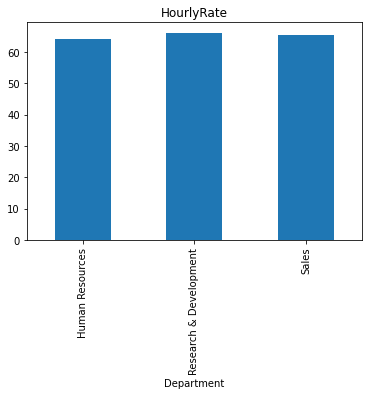

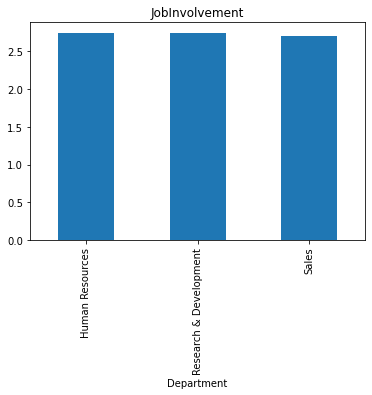

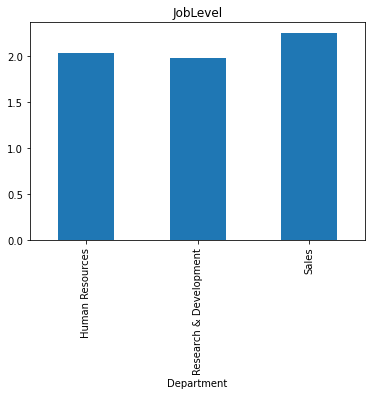

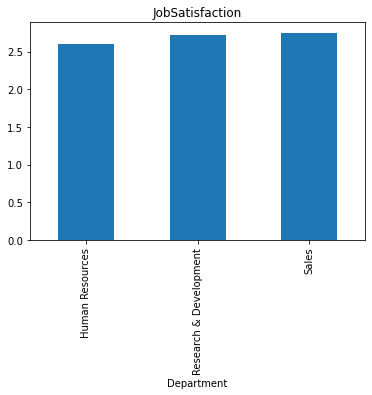

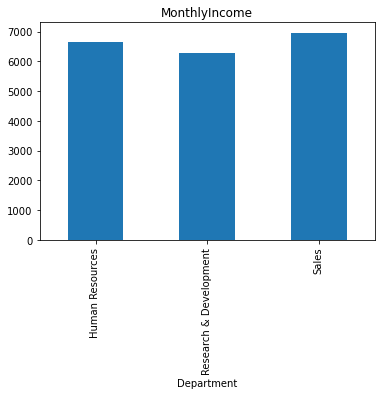

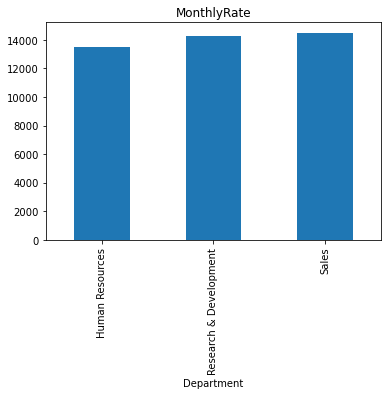

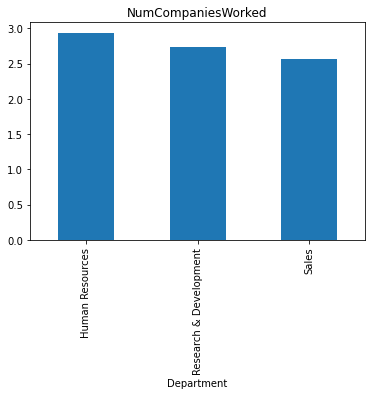

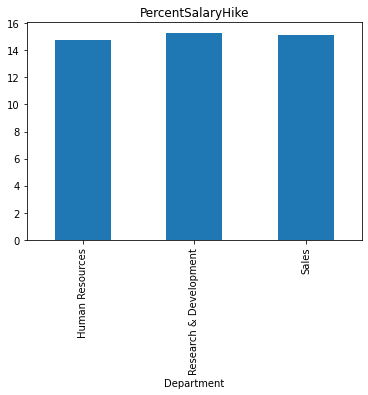

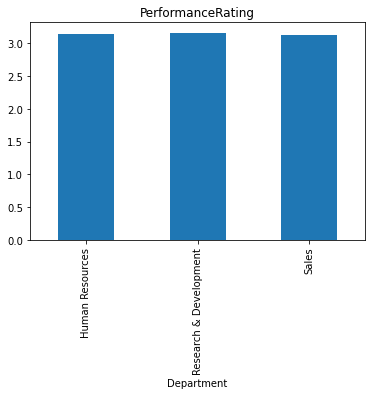

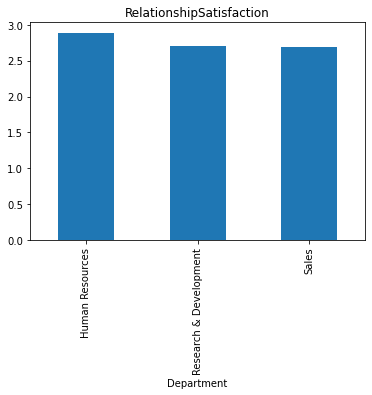

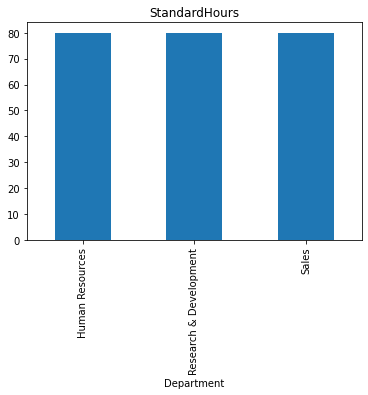

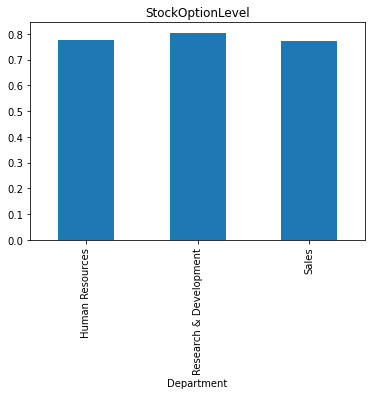

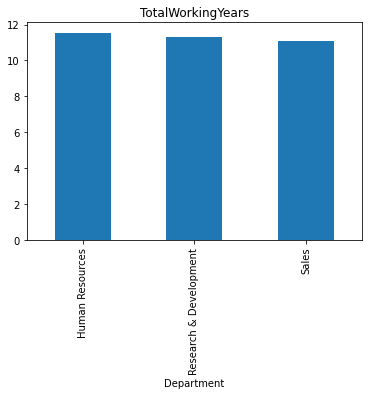

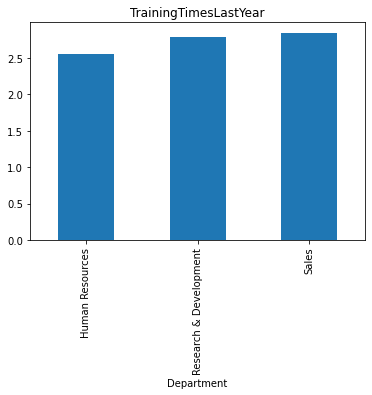

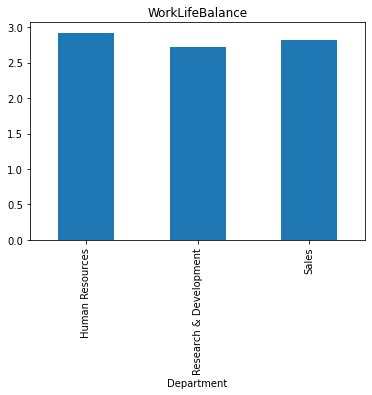

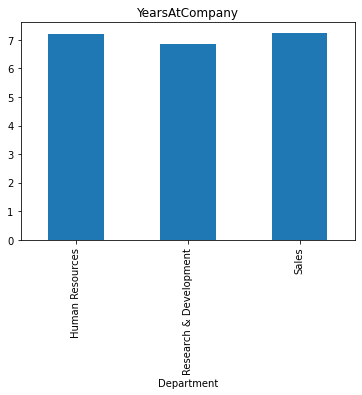

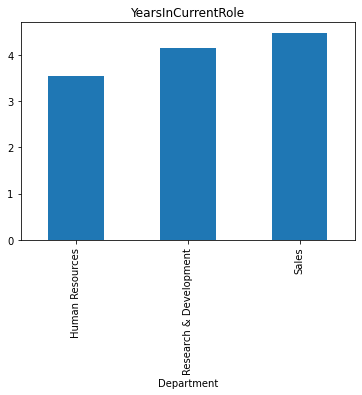

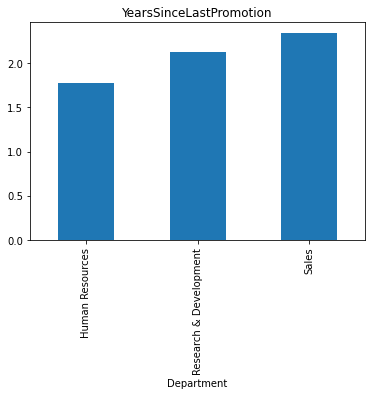

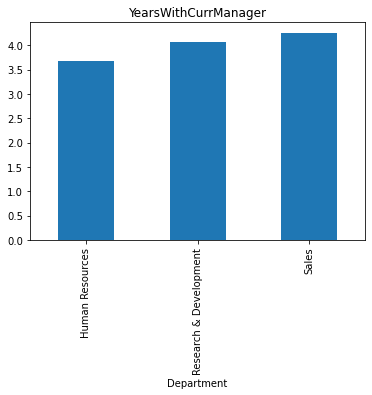

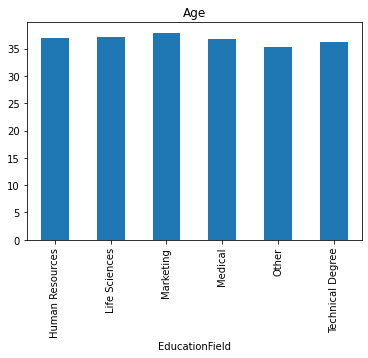

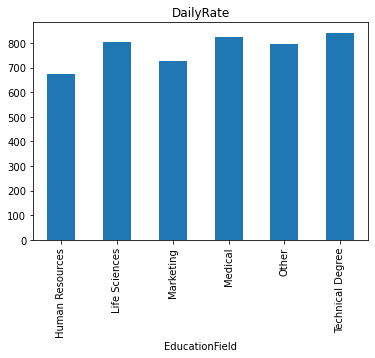

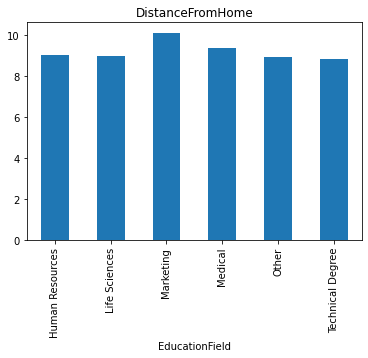

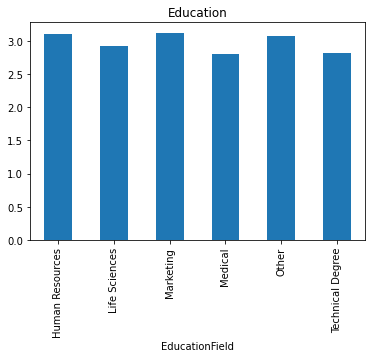

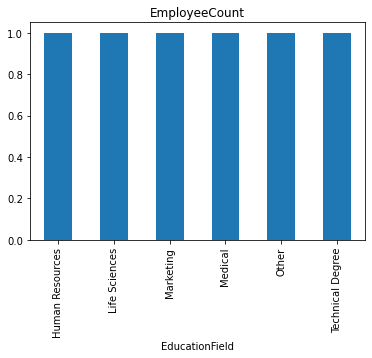

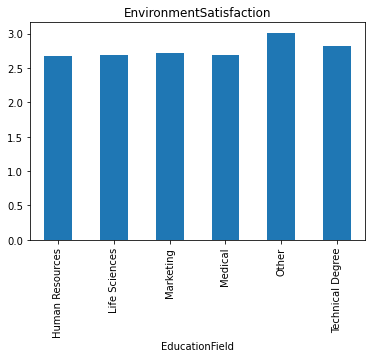

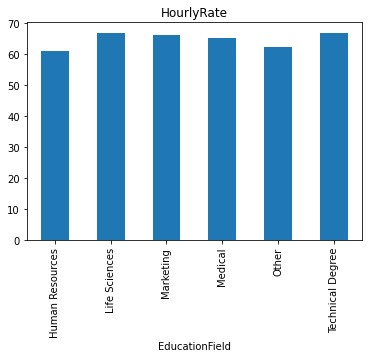

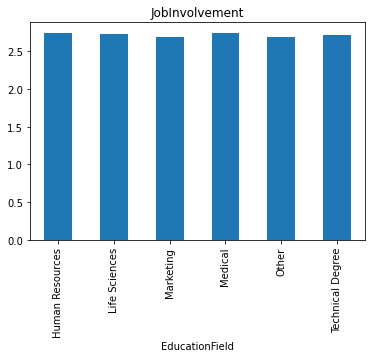

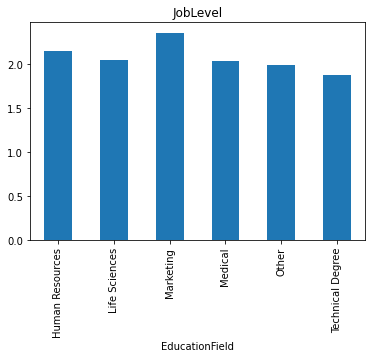

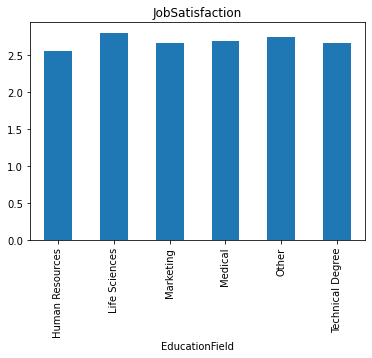

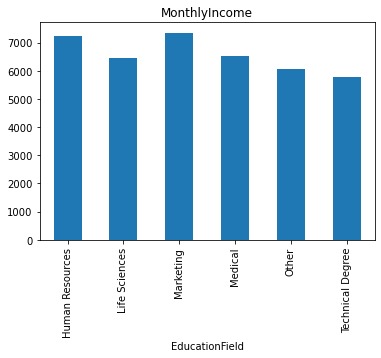

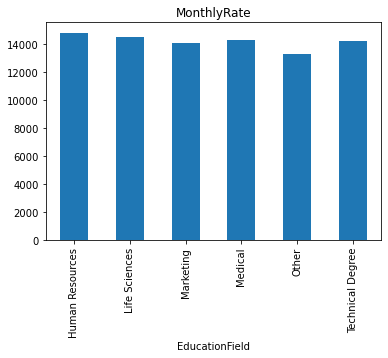

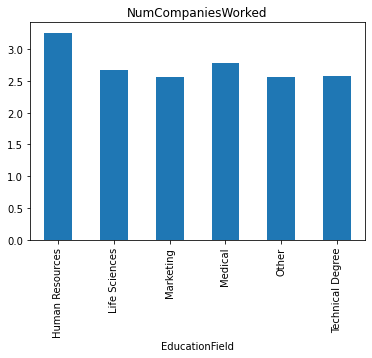

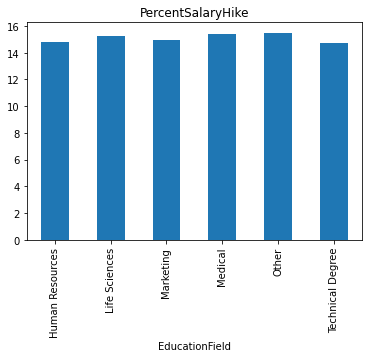

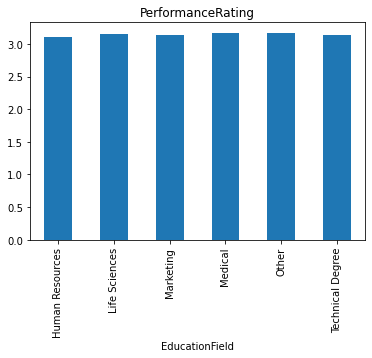

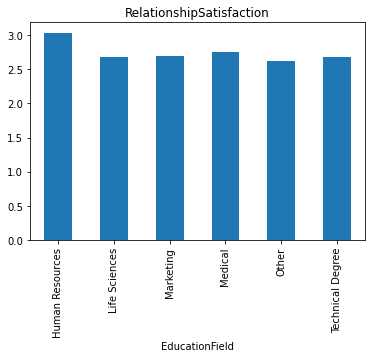

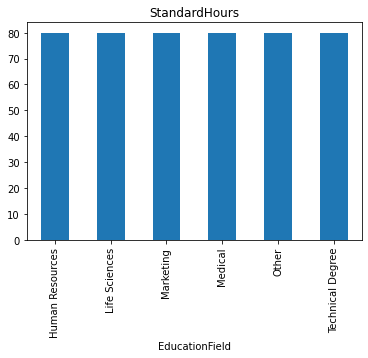

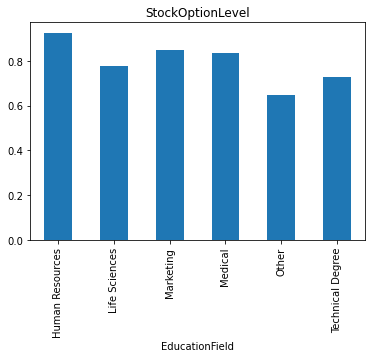

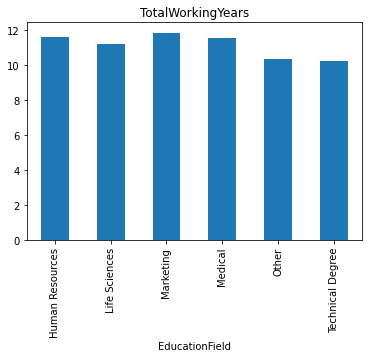

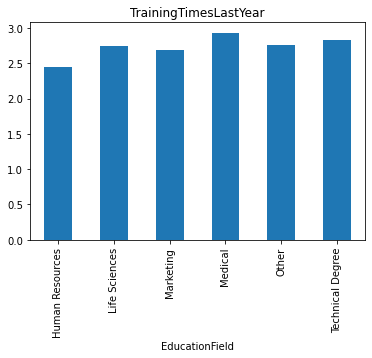

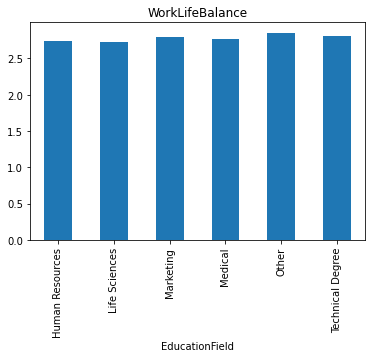

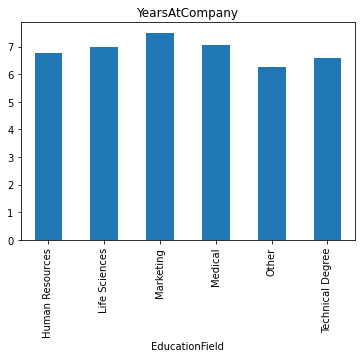

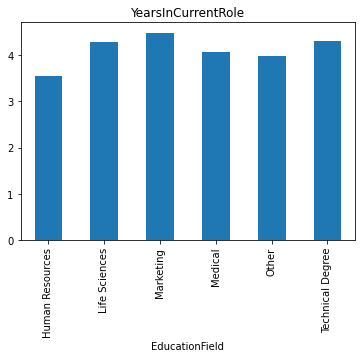

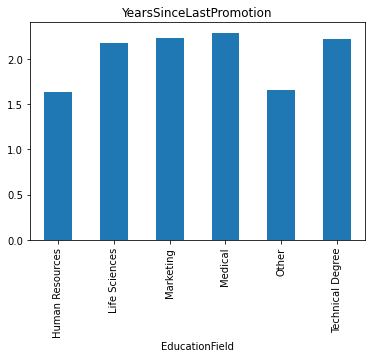

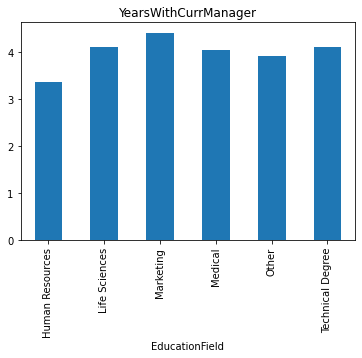

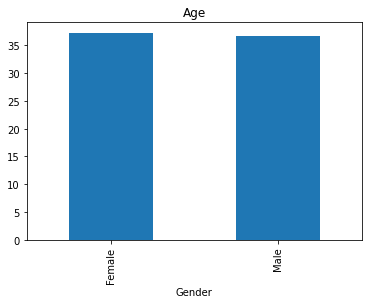

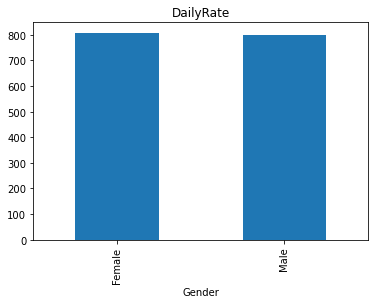

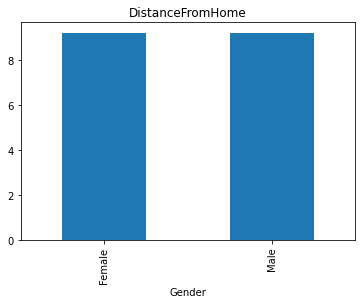

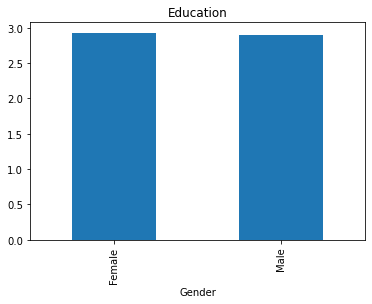

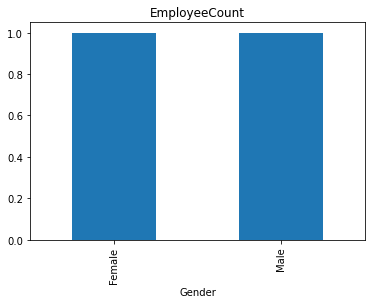

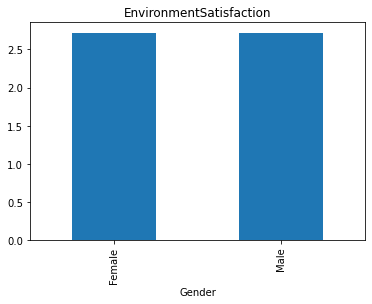

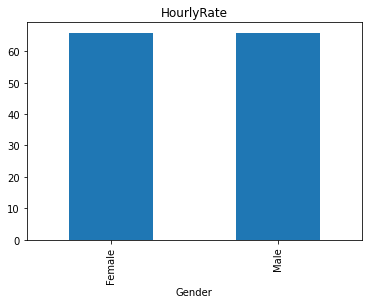

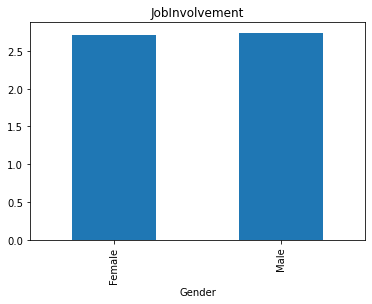

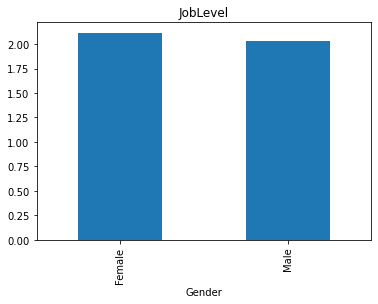

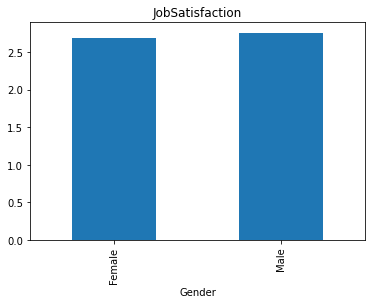

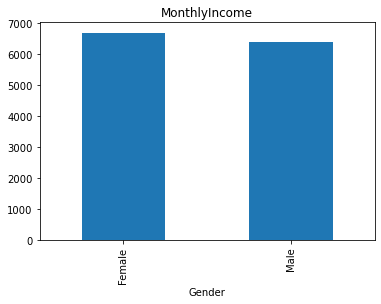

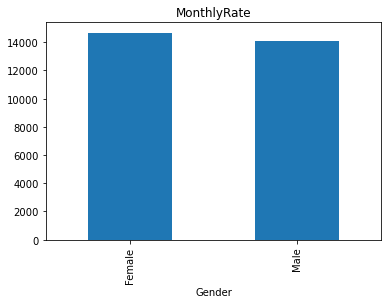

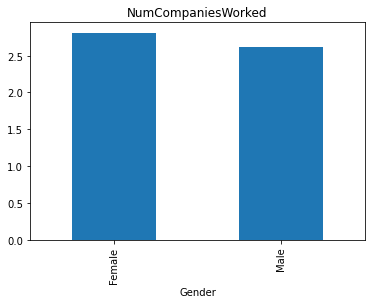

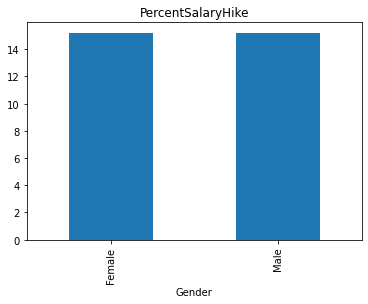

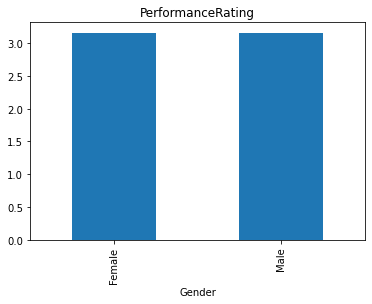

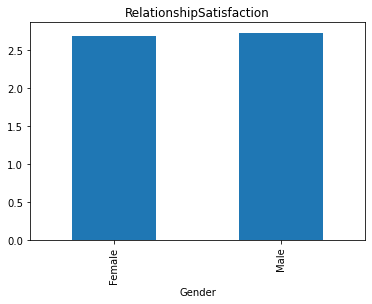

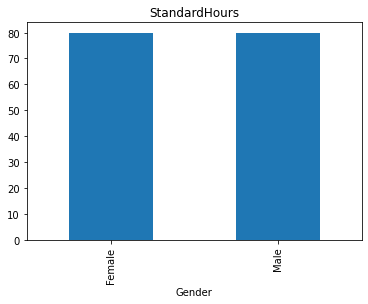

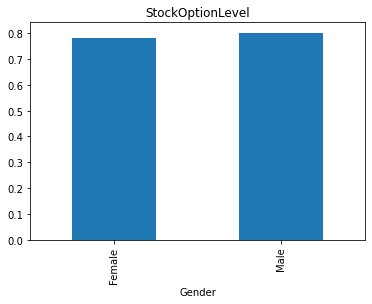

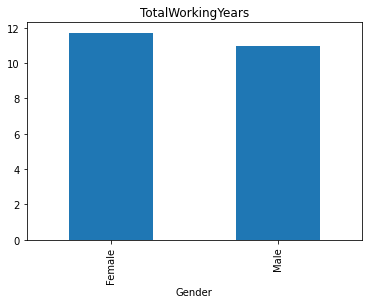

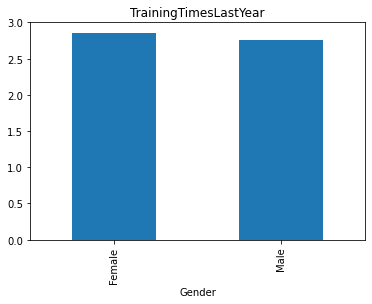

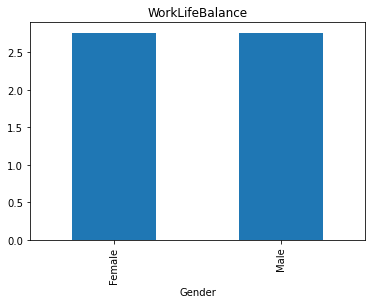

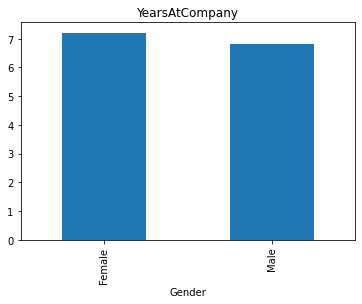

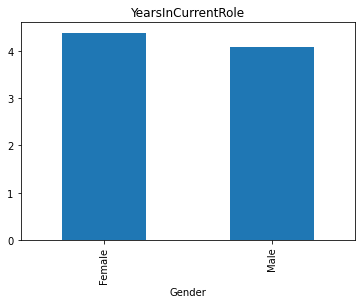

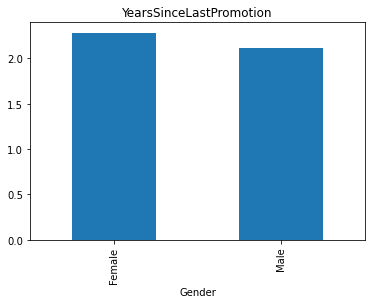

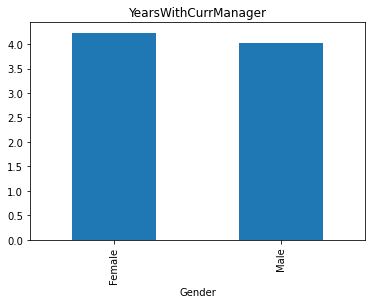

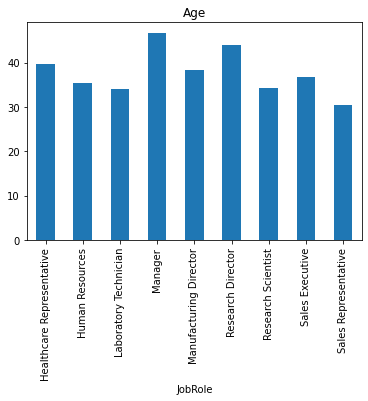

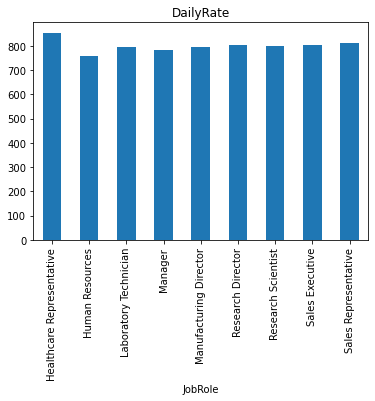

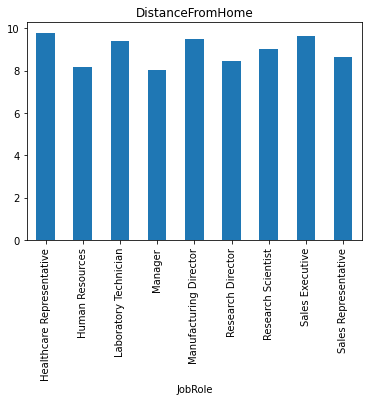

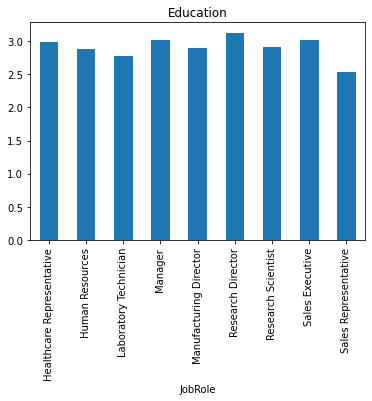

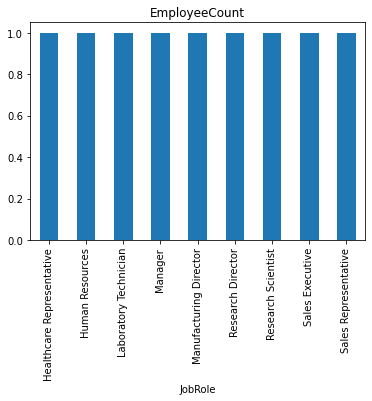

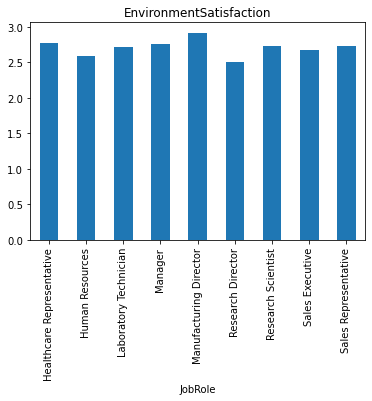

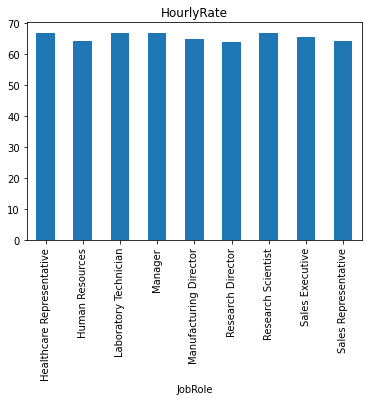

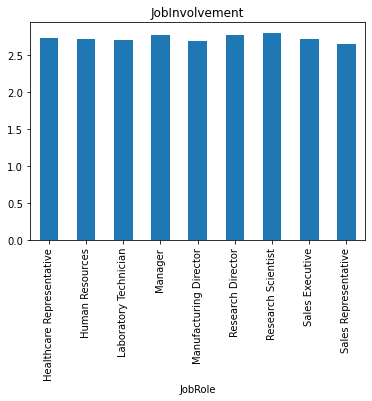

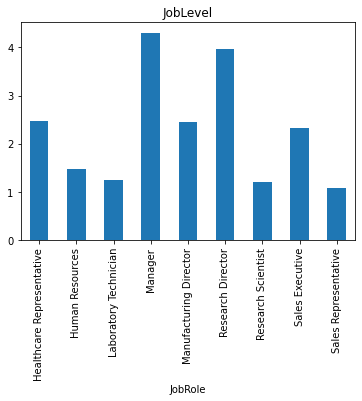

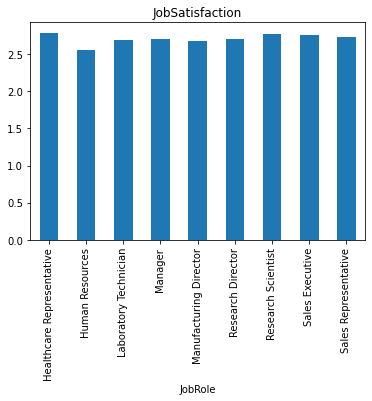

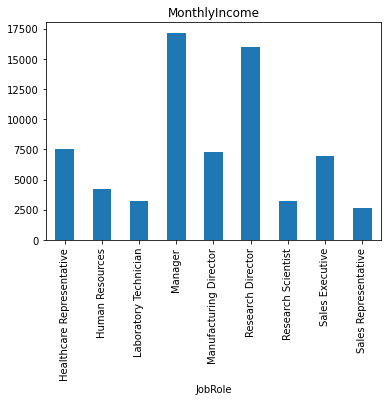

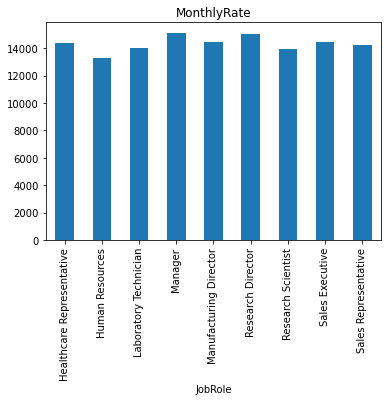

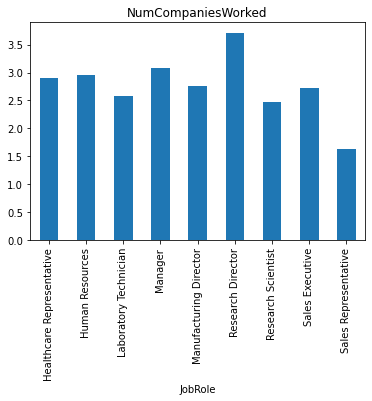

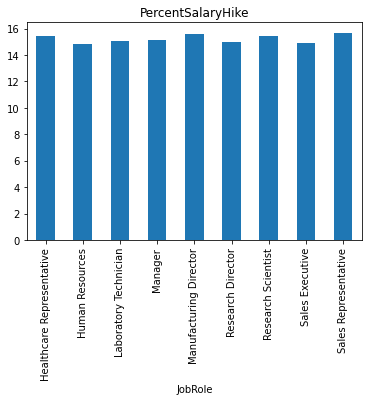

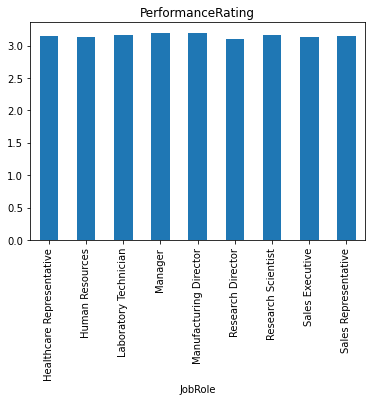

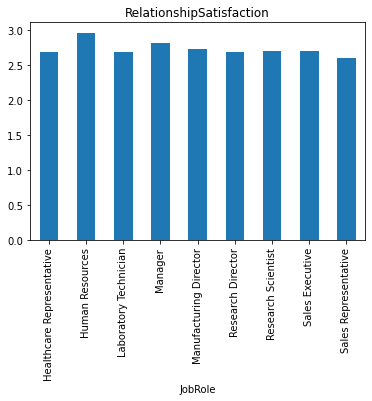

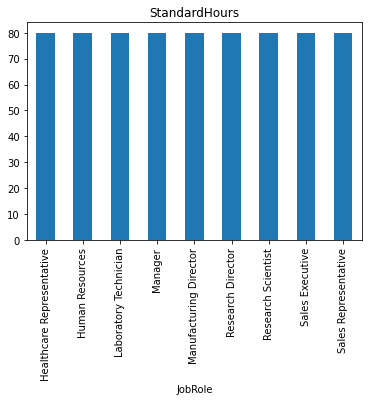

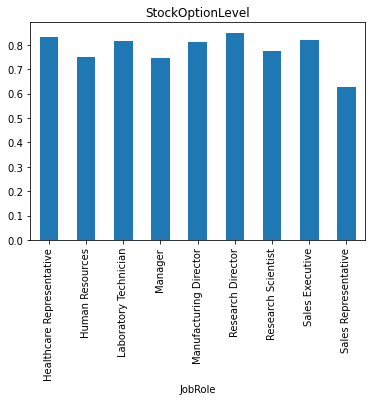

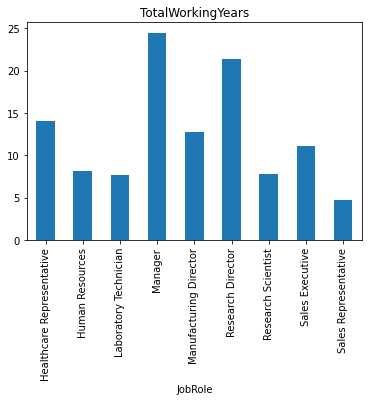

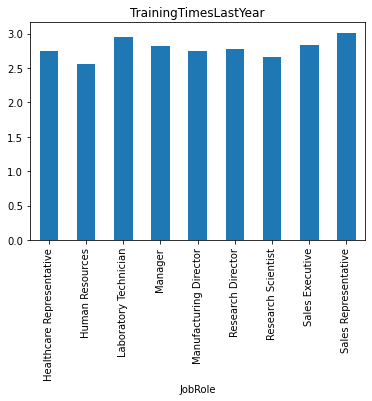

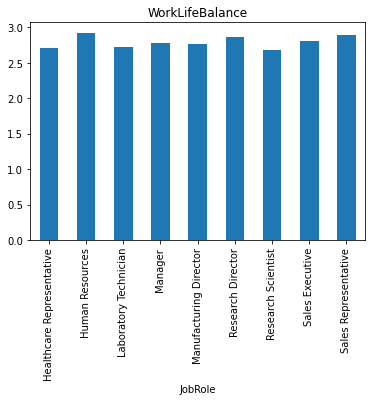

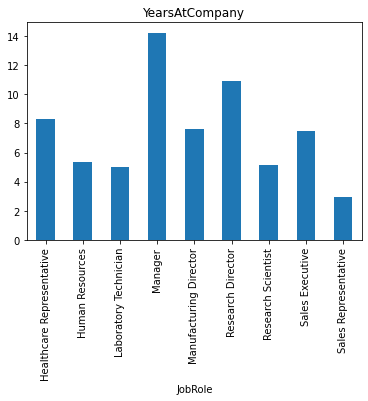

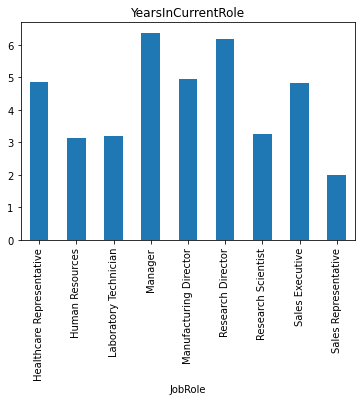

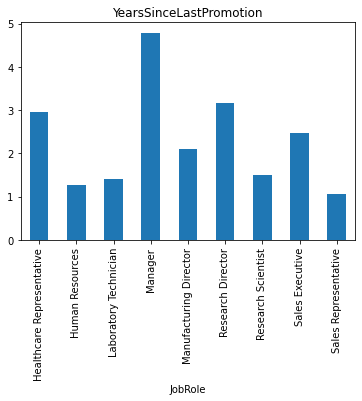

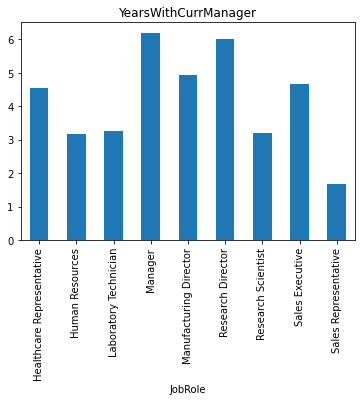

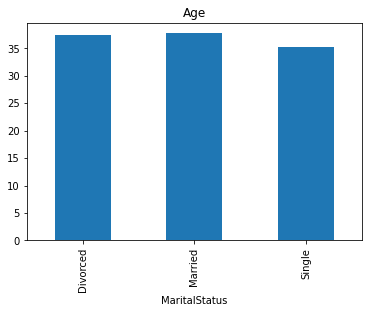

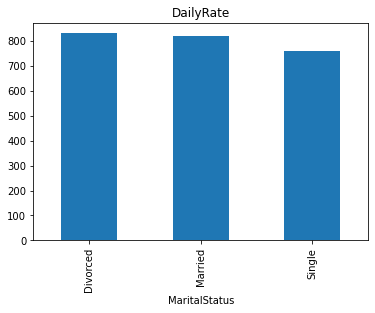

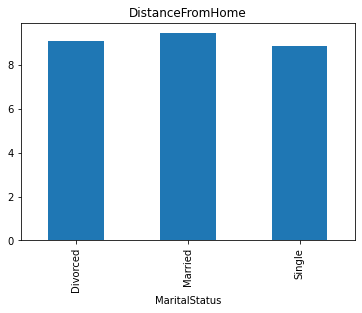

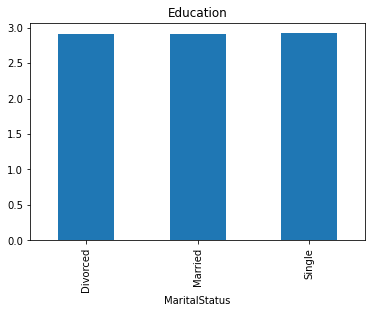

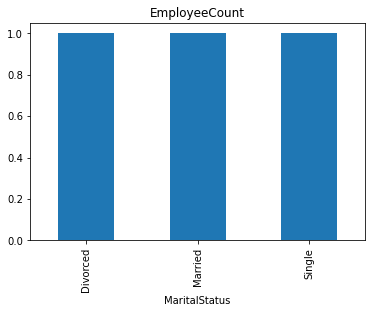

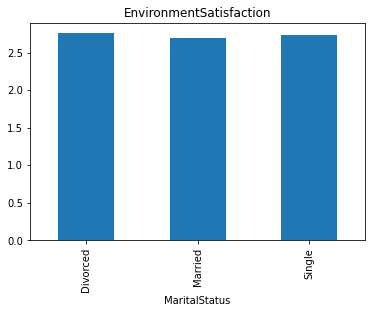

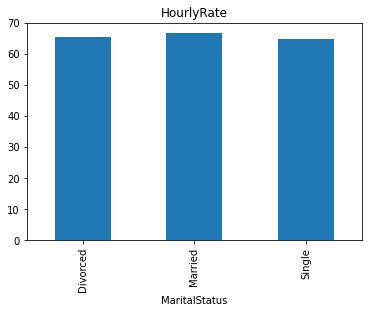

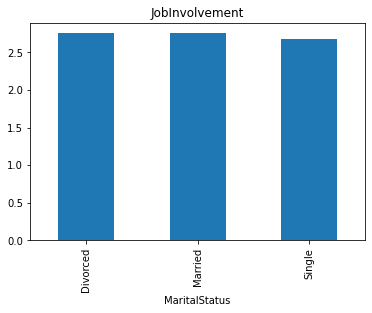

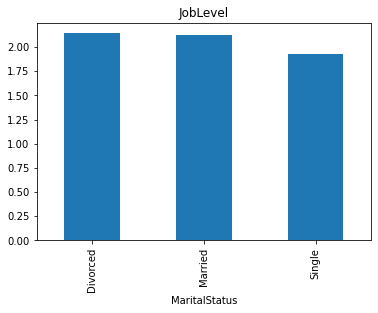

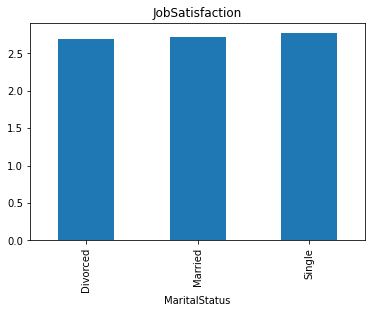

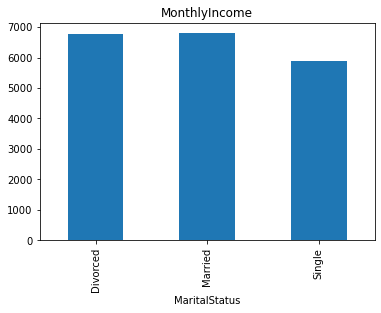

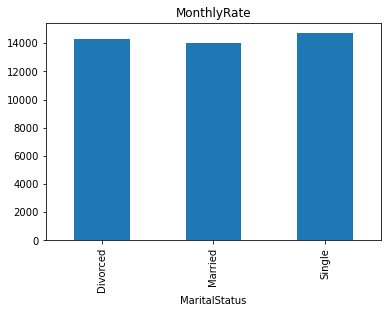

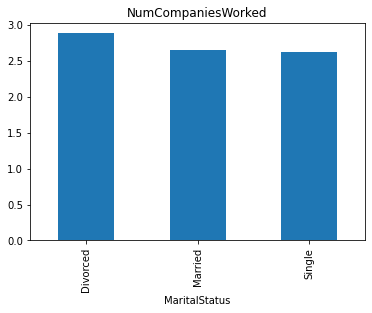

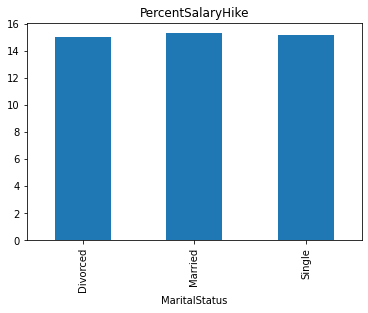

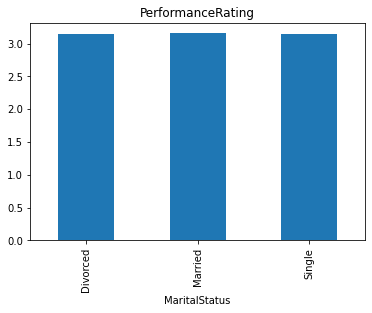

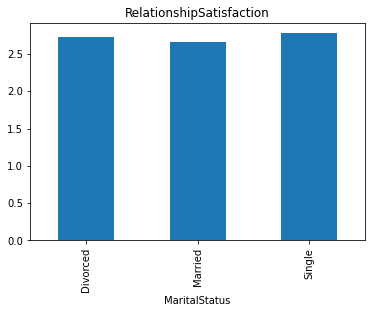

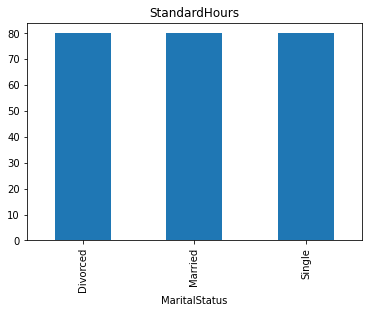

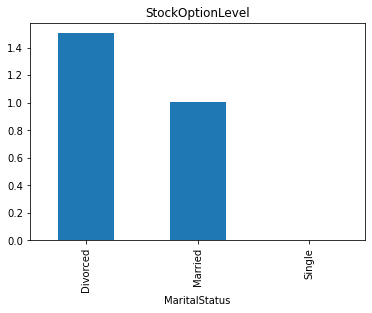

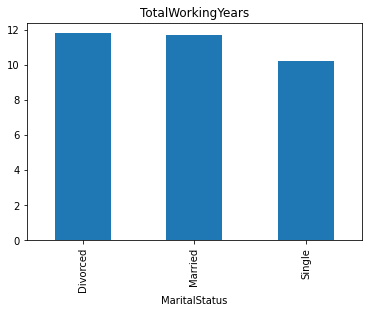

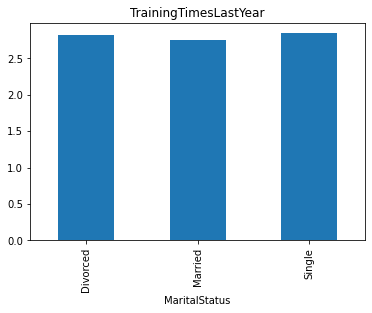

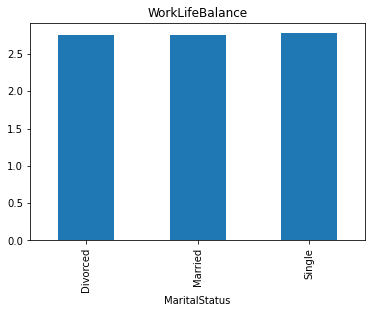

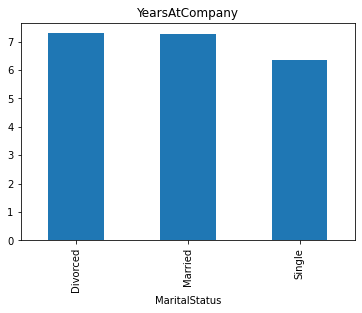

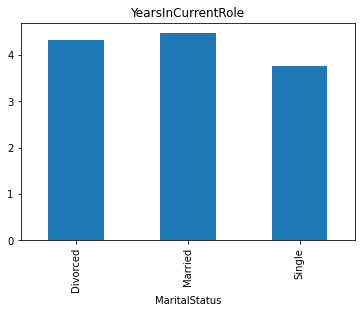

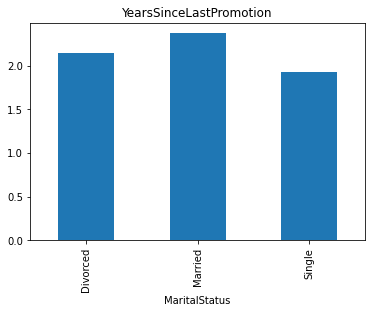

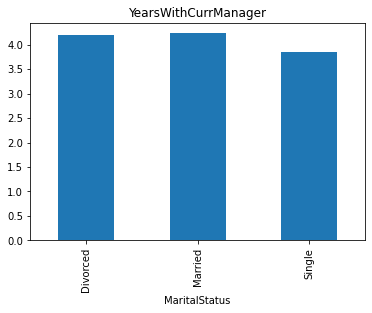

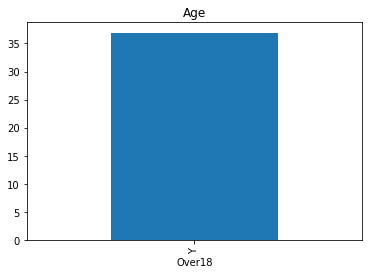

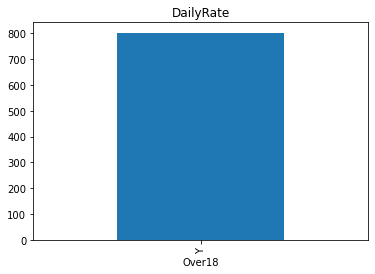

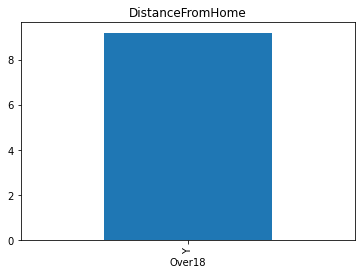

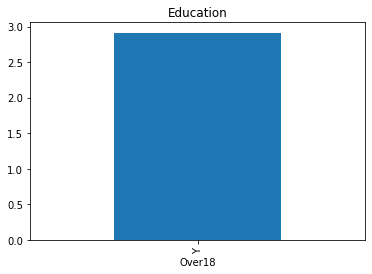

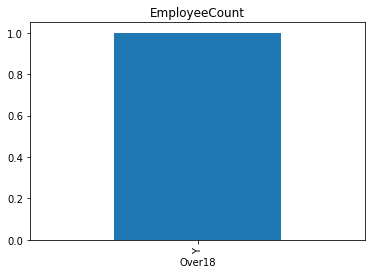

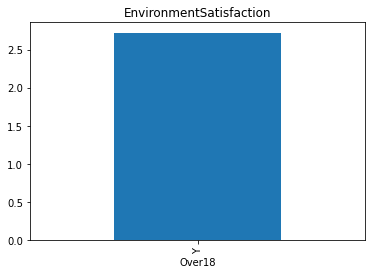

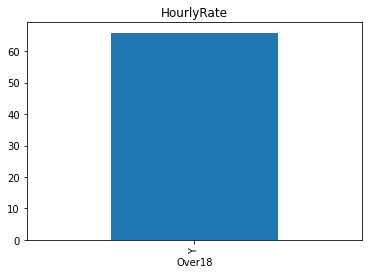

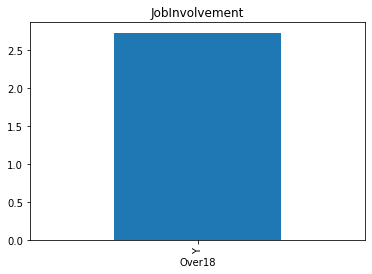

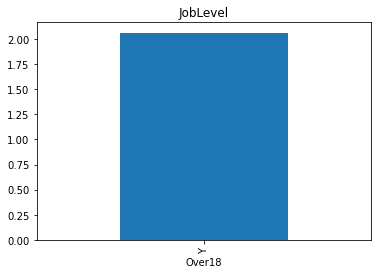

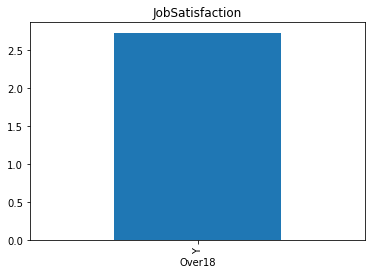

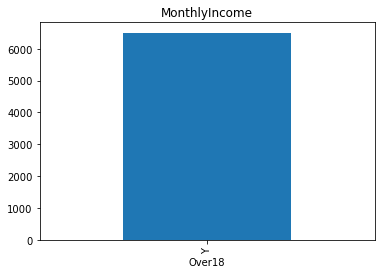

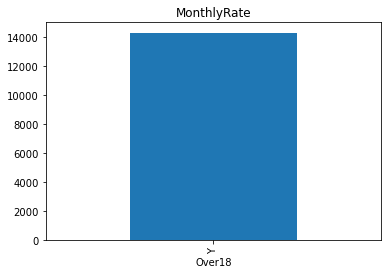

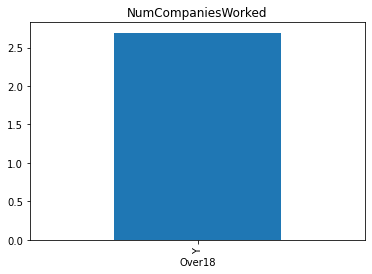

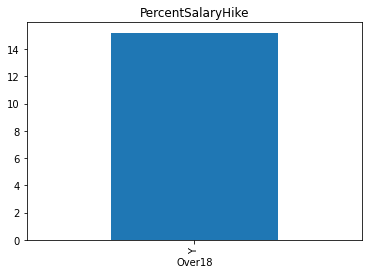

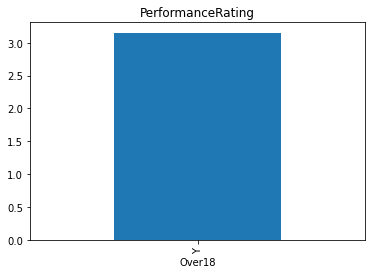

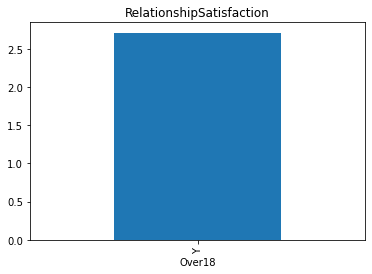

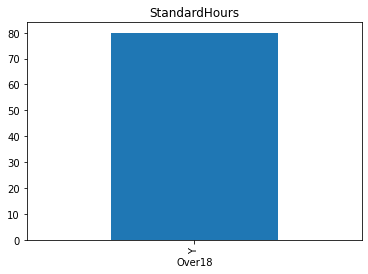

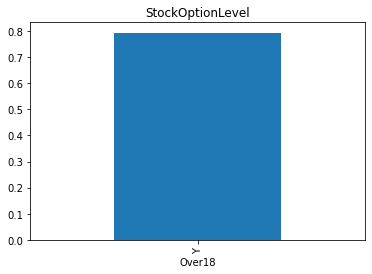

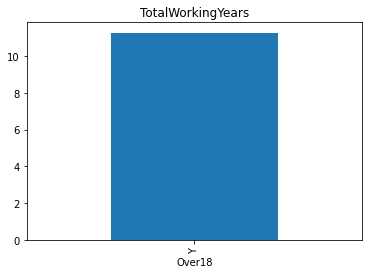

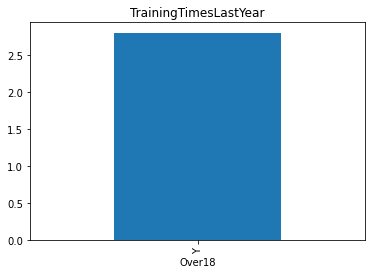

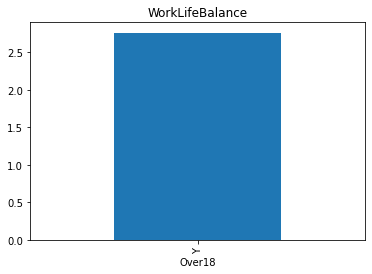

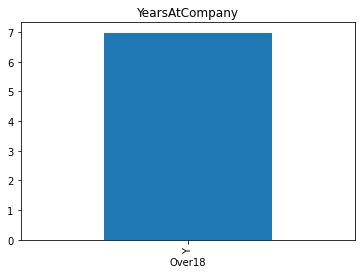

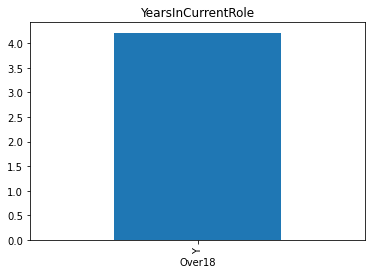

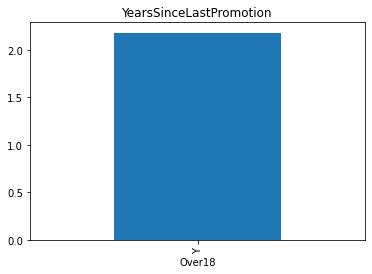

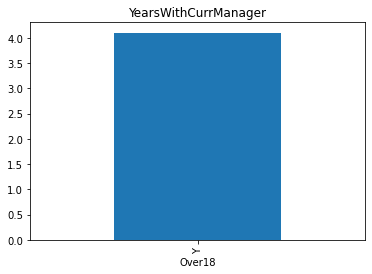

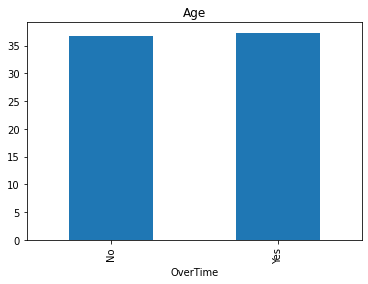

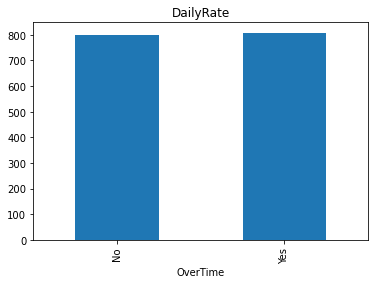

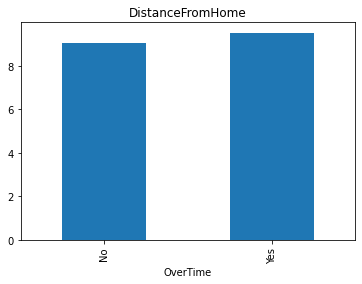

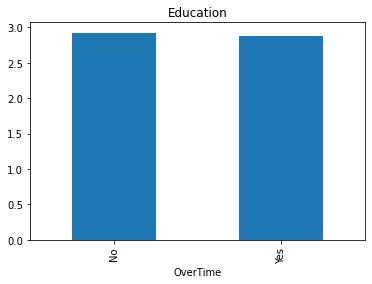

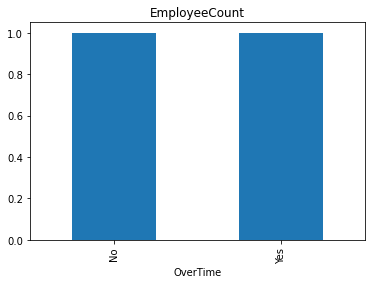

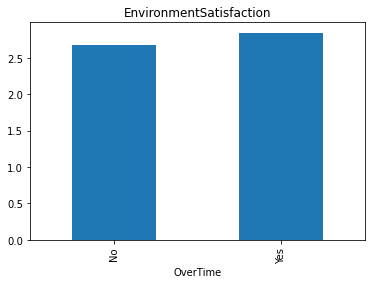

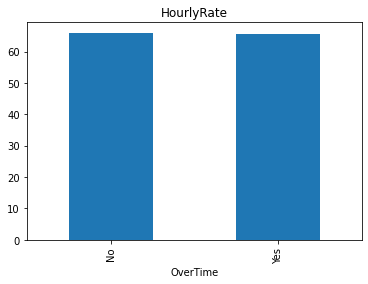

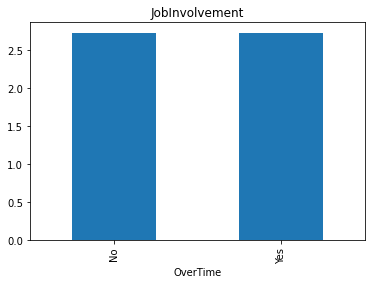

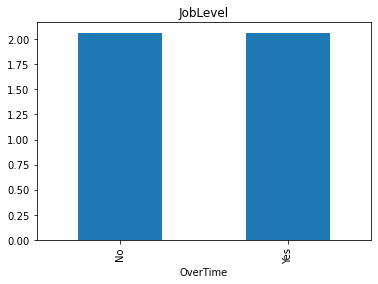

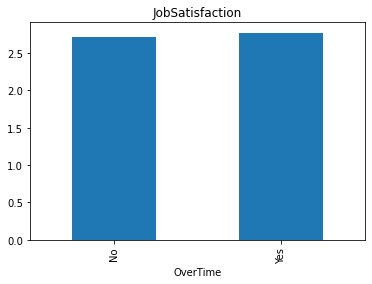

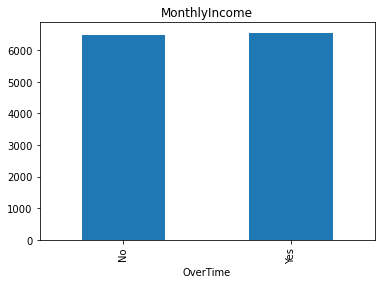

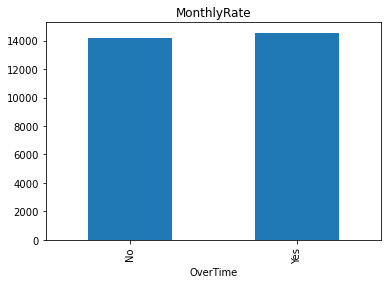

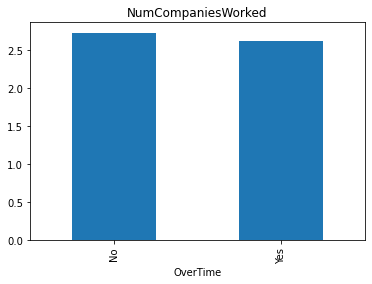

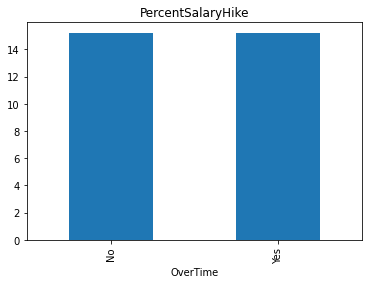

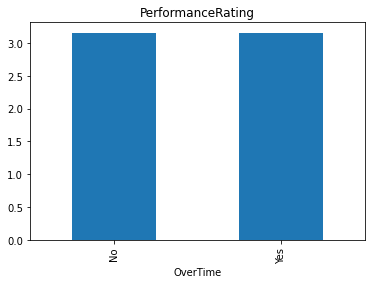

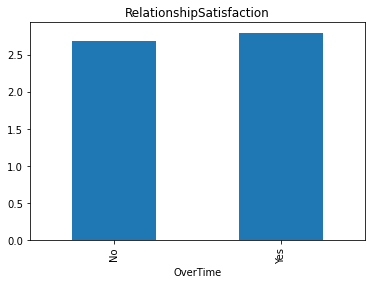

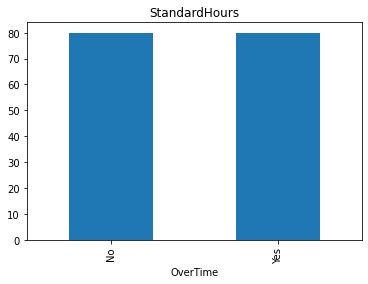

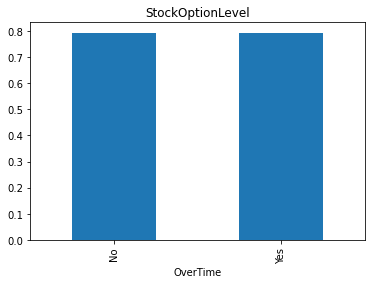

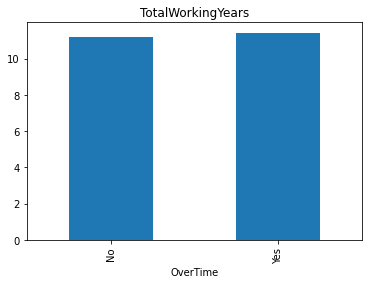

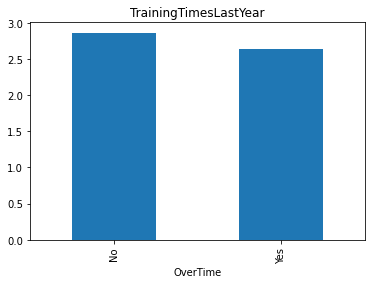

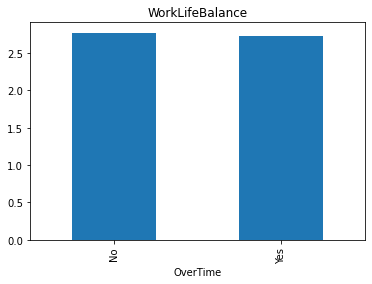

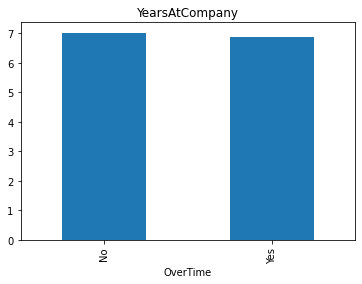

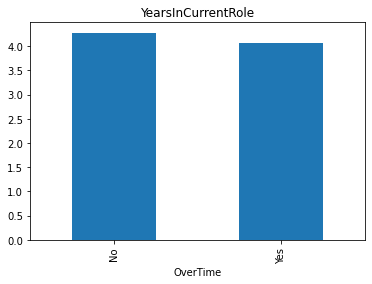

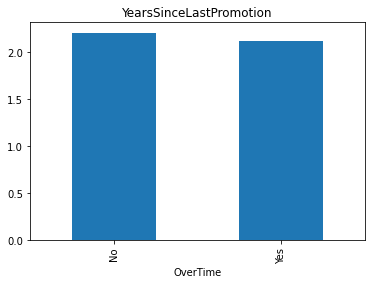

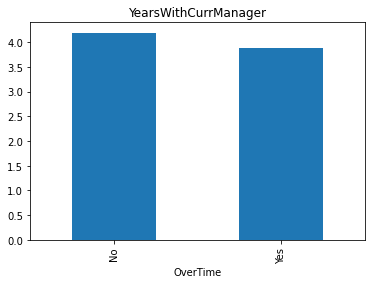

In [48]:
for cat_col in cat_cols:
    for num_col in num_cols:    
        df.groupby(cat_col)[num_col].mean().plot(kind='bar',title=num_col)
        plt.show()    


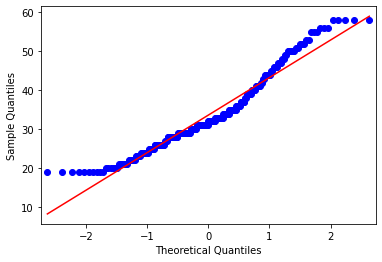

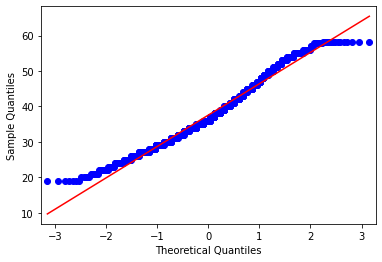

In [41]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']
qqplot(cat1['Age'].dropna(),line='s')
qqplot(cat2['Age'].dropna(),line='s')
pyplot.show()

In [40]:
from scipy.stats import ttest_ind
# cat1 = df[df['Gender']=='Female']
# cat2 = df[df['Gender']=='Male']

# cat1 = df[df['OverTime']=='Yes']
# cat2 = df[df['OverTime']=='No']

cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

for c in num_cols:
    print(c,ttest_ind(cat1[c].dropna(), cat2[c].dropna()))


Age Ttest_indResult(statistic=-6.1619170708362585, pvalue=9.265110321215315e-10)
DailyRate Ttest_indResult(statistic=-2.1707223426899125, pvalue=0.030111985944577032)
DistanceFromHome Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)
Education Ttest_indResult(statistic=-1.202625515508589, pvalue=0.2293152033223043)
EmployeeCount Ttest_indResult(statistic=nan, pvalue=nan)
EnvironmentSatisfaction Ttest_indResult(statistic=-3.9818600026818496, pvalue=7.17233854936886e-05)
HourlyRate Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)
JobInvolvement Ttest_indResult(statistic=-5.024140228583729, pvalue=5.677065356745289e-07)
JobLevel Ttest_indResult(statistic=-6.573837830953691, pvalue=6.795384780015255e-11)
JobSatisfaction Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05)
MonthlyIncome Ttest_indResult(statistic=-6.196869774037863, pvalue=7.467014948948873e-10)
MonthlyRate Ttest_indResult(statistic=0.5738131902127774

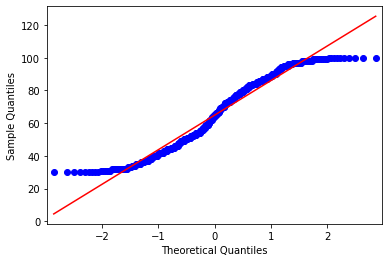

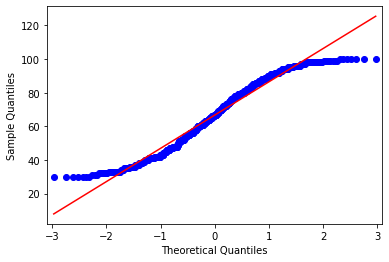

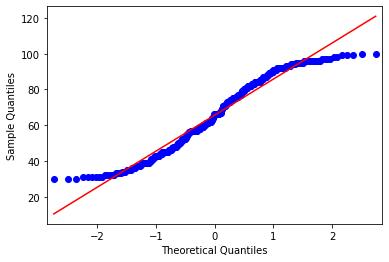

In [42]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cat1 = df[df['MaritalStatus']=='Single']
cat2 = df[df['MaritalStatus']=='Married']
cat3 = df[df['MaritalStatus']=='Divorced']

qqplot(cat1['HourlyRate'].dropna(),line='s')
qqplot(cat2['HourlyRate'].dropna(),line='s')
qqplot(cat3['HourlyRate'].dropna(),line='s')

pyplot.show()

In [44]:
from scipy import stats
cat1 = df[df['MaritalStatus']=='Single']
cat2 = df[df['MaritalStatus']=='Married']
cat3 = df[df['MaritalStatus']=='Divorced']

for c in num_cols:   
    f_val, p_val = stats.f_oneway(cat1[c].dropna(), cat2[c].dropna(),cat3[c].dropna())            
    print (c,"--- One-way ANOVA P =", p_val )

Age --- One-way ANOVA P = 2.6791245810707717e-05
DailyRate --- One-way ANOVA P = 0.013734910863353756
DistanceFromHome --- One-way ANOVA P = 0.46925999474534197
Education --- One-way ANOVA P = 0.9866473058085357
EmployeeCount --- One-way ANOVA P = nan
EnvironmentSatisfaction --- One-way ANOVA P = 0.676646276404391
HourlyRate --- One-way ANOVA P = 0.33018469018887
JobInvolvement --- One-way ANOVA P = 0.2223090347117373
JobLevel --- One-way ANOVA P = 0.003679708794523679
JobSatisfaction --- One-way ANOVA P = 0.6216088125839607
MonthlyIncome --- One-way ANOVA P = 0.0029135329571283383
MonthlyRate --- One-way ANOVA P = 0.3096157010792671
NumCompaniesWorked --- One-way ANOVA P = 0.28985327208609046
PercentSalaryHike --- One-way ANOVA P = 0.6131614282523055
PerformanceRating --- One-way ANOVA P = 0.9069157114230053
RelationshipSatisfaction --- One-way ANOVA P = 0.20120440611876003
StandardHours --- One-way ANOVA P = nan
StockOptionLevel --- One-way ANOVA P = 3.997635981623298e-197
TotalWorki

C:\Users\ABC\anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


<Figure size 432x288 with 0 Axes>

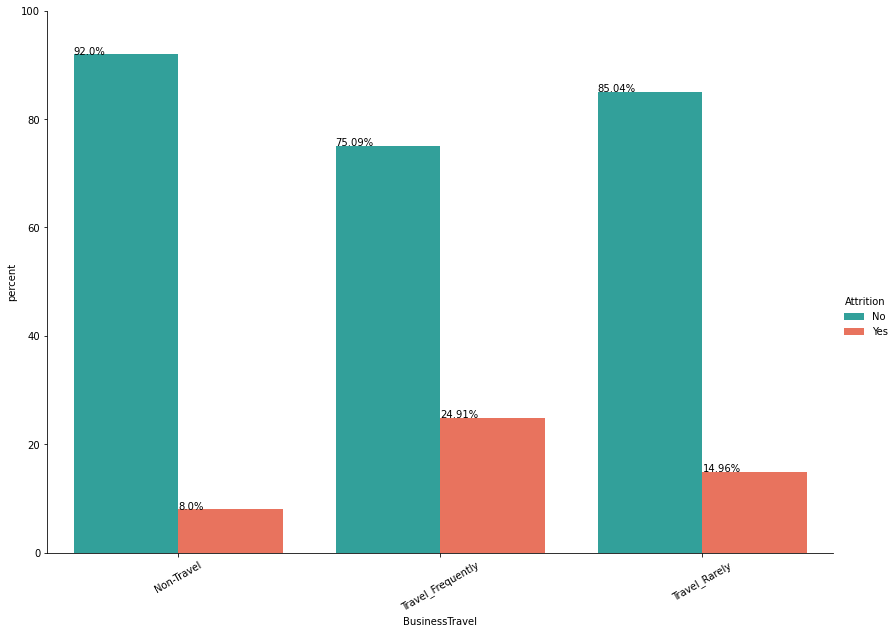

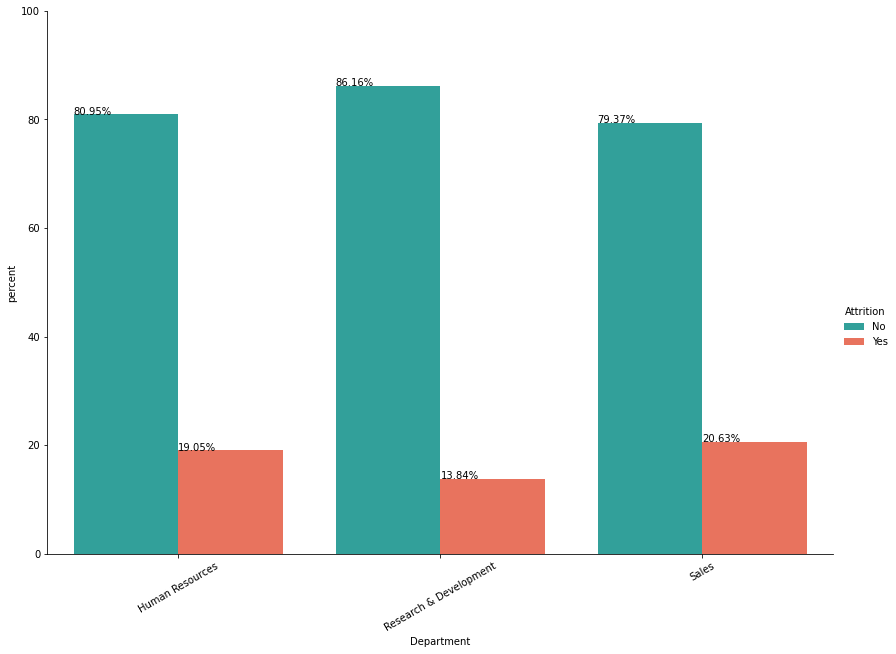

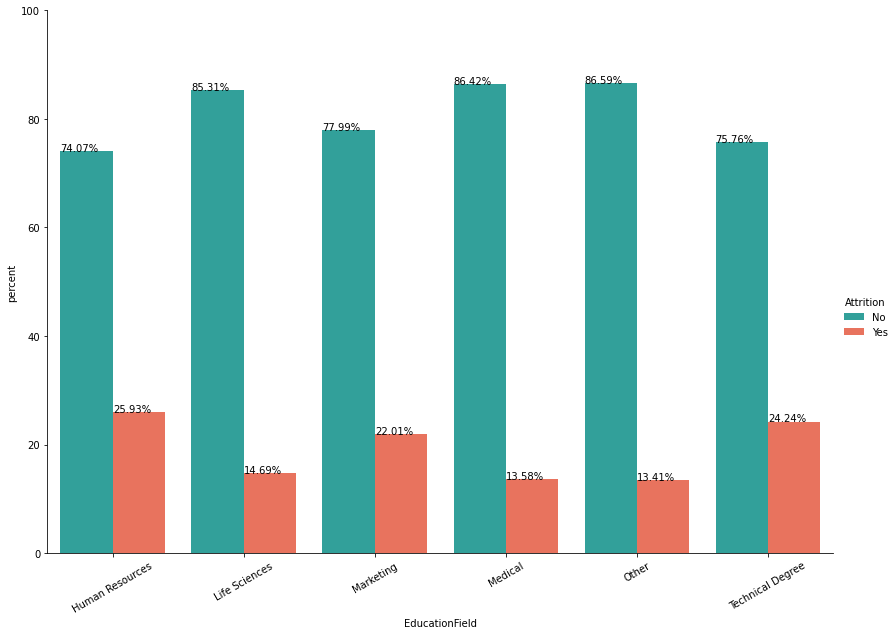

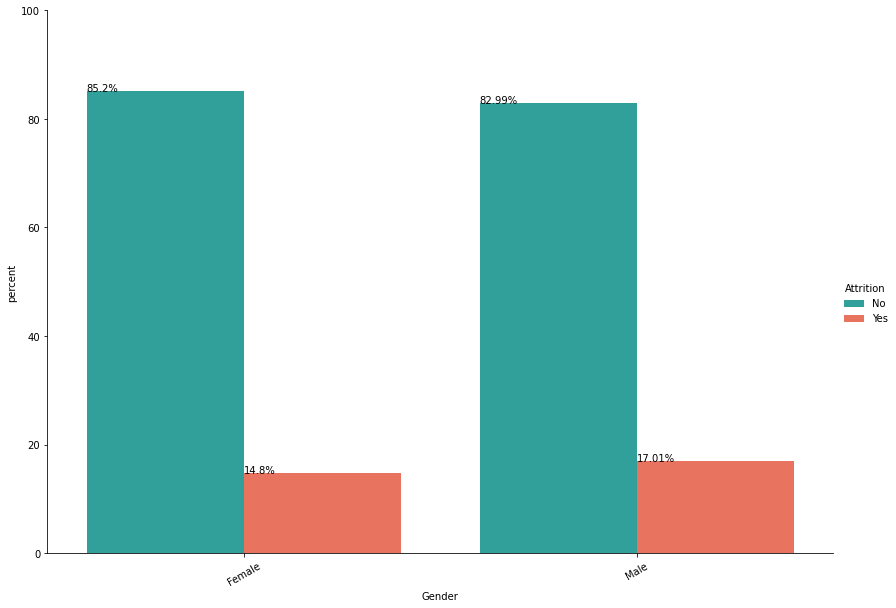

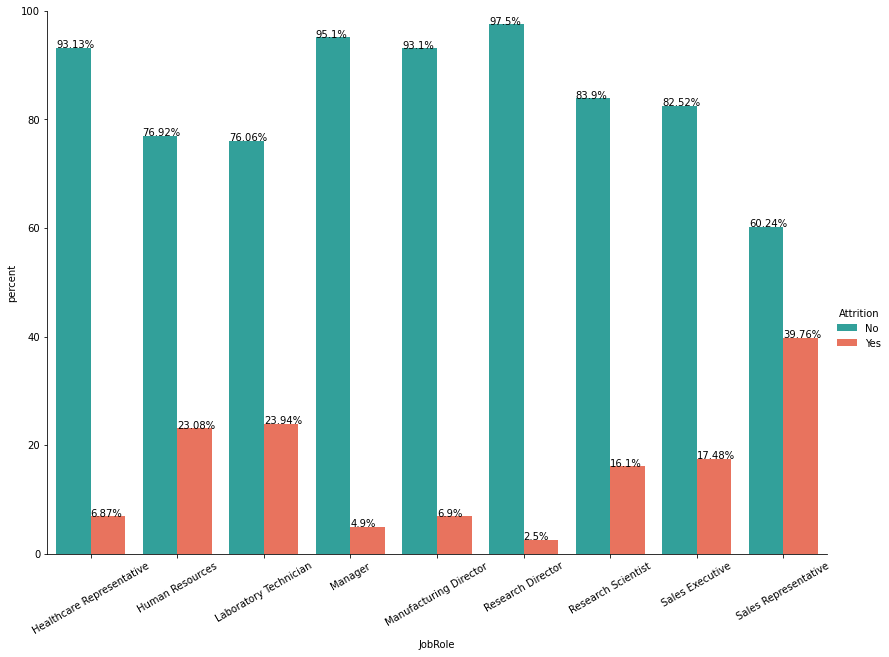

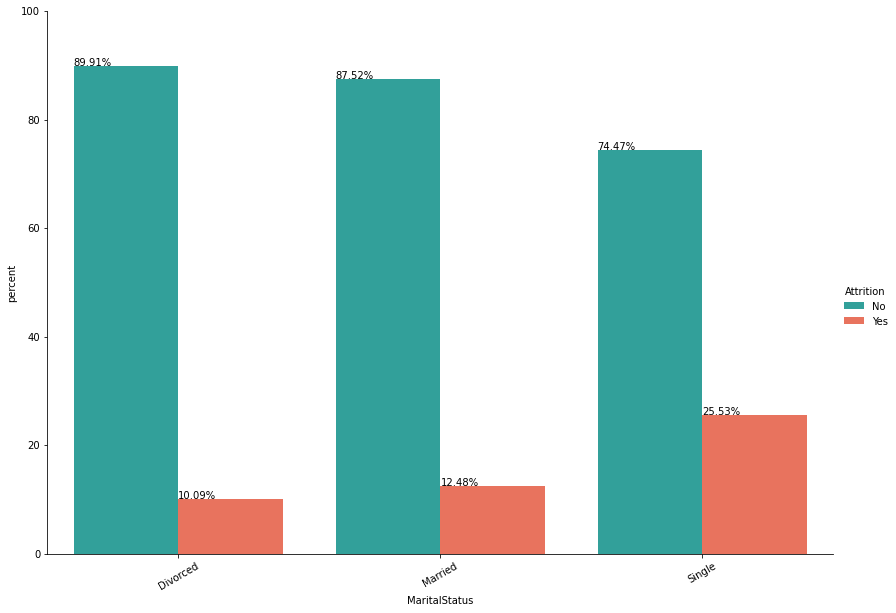

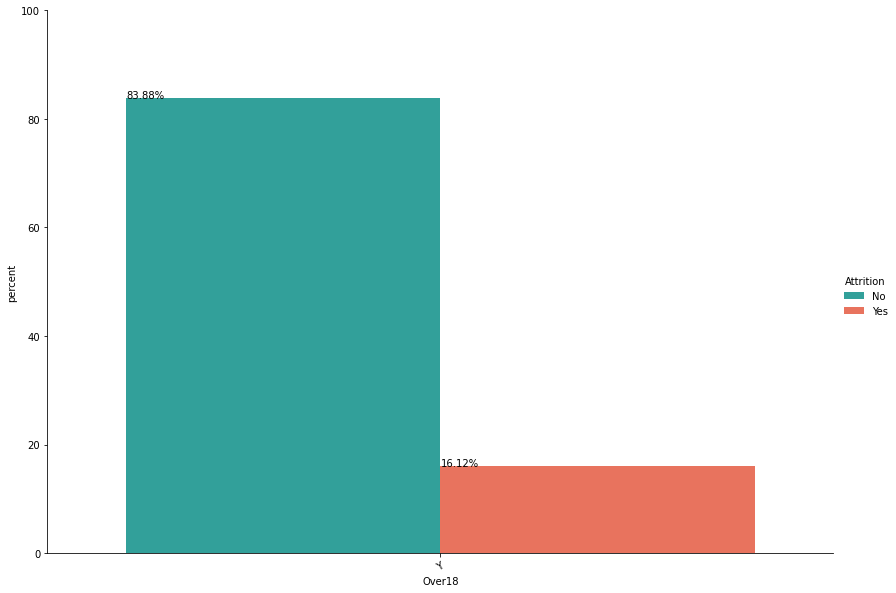

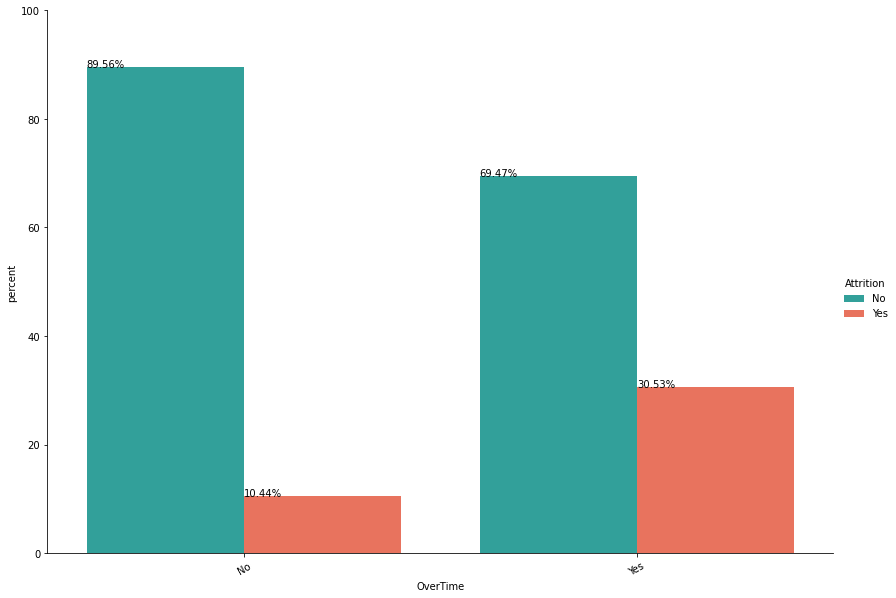

In [39]:
#Plot each attribute vs Class in percentage
y = 'Attrition'
for i, predictor in enumerate(df[cat_cols]):
    plt.figure(i)
    df1 = df.groupby(predictor)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=predictor,y='percent',hue=y,kind='bar',data=df1,
                    palette=sns.color_palette(['lightseagreen', 'tomato']),height=8.27, aspect=11.7/8.27)
    g.set_xticklabels(rotation=30)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(np.nan_to_num(p.get_height().round(2))) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        txt_y=np.nan_to_num(txt_y)
        g.ax.text(txt_x,txt_y,txt)

## Data processing and cleaning

In [53]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:

num_cols=df.select_dtypes('number').drop(['EmployeeNumber'],axis=1).columns.tolist()

cat_cols=df.select_dtypes(object).drop(['Attrition','JobRole','EducationField'],axis=1).columns.tolist()

df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

df=df.query('`Attrition`.notnull()',engine='python')

In [55]:
#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



In [56]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

In [57]:
# c='Purpose'
# percentage=5
# dct={}
# series = pd.value_counts(df[c])
# mask = (series/series.sum() * 100).lt(percentage)             
# dct[c] = series[mask].index.values.tolist()
# dct[c]
# df[c] = np.where(df[c].isin(dct[c]),'Other',df[c])
# df[c].value_counts()

In [58]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
26             StandardHours           1
21                    Over18           1
8              EmployeeCount           1
11                    Gender           2
24         PerformanceRating           2
22                  OverTime           2
1                  Attrition           2
17             MaritalStatus           3
4                 Department           3
2             BusinessTravel           3
27          StockOptionLevel           4
10   EnvironmentSatisfaction           4
30           WorkLifeBalance           4
13            JobInvolvement           4
25  RelationshipSatisfaction           4
16           JobSatisfaction           4
6                  Education           5
14                  JobLevel           5
7             EducationField           6
29     TrainingTimesLastYear           7
15                   JobRole           9
20        NumCompaniesWorked          10
23         PercentSalaryHike          15
34      YearsWithCurrManager          15
33   YearsSinceLastPromotion          15
32        YearsInCurrentRole          16
5           DistanceFromHome          29
31            YearsAtCompany          31
28         TotalWorkingYears          35
0                        Age          41
12                HourlyRate          71
3                  DailyRate         869
18             MonthlyIncome        1321
19               MonthlyRate        1400
9             EmployeeNumber        1470

In [59]:
df.query('`Attrition`.notnull()',engine='python')

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0     41.0       Yes      Travel_Rarely     1102.0                   Sales               1.0        2.0  Life Sciences            1.0               1                      2.0  Female        94.0             3.0       2.0            Sales Executive              4.0        Single         5993.0      19479.0                 8.0      Y      Yes               11.0                3.0                       1.0           80.0               0.0                8.0                    0.0              1.0             6.0                 4.0                      0.0                   5.0
1     49.0        No  Travel_Frequently      279.0  Research & Development               8.0        1.0  Life Sciences            1.0               2                      3.0    Male        61.0             2.0       2.0         Research Scientist              2.0       Married         5130.0      24907.0                 1.0      Y       No               23.0                4.0                       4.0           80.0               1.0               10.0                    3.0              3.0            10.0                 7.0                      1.0                   7.0
2     37.0       Yes      Travel_Rarely     1373.0  Research & Development               2.0        2.0          Other            1.0               4                      4.0    Male        92.0             2.0       1.0      Laboratory Technician              3.0        Single         2090.0       2396.0                 6.0      Y      Yes               15.0                3.0                       2.0           80.0               0.0                7.0                    3.0              3.0             0.0                 0.0                      0.0                   0.0
3     33.0        No  Travel_Frequently     1392.0  Research & Development               3.0        4.0  Life Sciences            1.0               5                      4.0  Female        56.0             3.0       1.0         Research Scientist              3.0       Married         2909.0      23159.0                 1.0      Y      Yes               11.0                3.0                       3.0           80.0               0.0                8.0                    3.0              3.0             8.0                 7.0                      3.0                   0.0
4     27.0        No      Travel_Rarely      591.0  Research & Development               2.0        1.0        Medical            1.0               7                      1.0    Male        40.0             3.0       1.0      Laboratory Technician              2.0       Married         3468.0      16632.0                 9.0      Y       No               12.0                3.0                       4.0           80.0               1.0                6.0                    3.0              3.0             2.0                 2.0                      2.0                   2.0
...    ...       ...                ...        ...                     ...               ...        ...            ...            ...             ...                      ...     ...         ...             ...       ...                        ...              ...           ...            ...          ...                 ...    ...      ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ... 

In [60]:
#check for missing values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

In [61]:
#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


# cat_cols.remove('Attrition')
df=one_hot(df,cat_cols)
df.head()

Age Attrition  DailyRate  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  Gender_Female  Gender_Male  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  OverTime_Yes
0  41.0       Yes     1102.0               1.0        2.0  Life Sciences            1.0               1                      2.0        94.0             3.0       2.0        Sales Executive              4.0         5993.0      19479.0                 8.0               11.0                3.0                       1.0           80.0               0.0                8.0                    0.0              1.0             6.0                 4.0                      0.0                   5.0                          0                                 0                             1                           0                                  0                 1              1            0                       0                      0                     1         1            0             1
1  49.0        No      279.0               8.0        1.0  Life Sciences            1.0               2                      3.0        61.0             2.0       2.0     Research Scientist              2.0         5130.0      24907.0                 1.0               23.0                4.0                       4.0           80.0               1.0               10.0                    3.0              3.0            10.0                 7.0                      1.0                   7.0                          0                                 1                             0                           0                                  1                 0              0            1                       0                      1                     0         1            1             0
2  37.0       Yes     1373.0               2.0        2.0          Other            1.0               4                      4.0        92.0             2.0       1.0  Laboratory Technician              3.0         2090.0       2396.0                 6.0               15.0                3.0                       2.0           80.0               0.0                7.0                    3.0              3.0             0.0                 0.0                      0.0                   0.0                          0                                 0                             1                           0                                  1                 0              0            1                       0                      0                     1         1            0             1
3  33.0        No     1392.0               3.0        4.0  Life Sciences            1.0               5                      4.0        56.0             3.0       1.0     Research Scientist              3.0         2909.0      23159.0                 1.0               11.0                3.0                       3.0           80.0               0.0                8.0                    3.0              3.0             8.0                 7.0                      3.0                   0.0                          0                                 1                             0                           0                                  1                 0              1            0                       0                      1                     0         1            0             1
4  2

In [62]:
item_list = df.columns.tolist()
item_list = [e for e in item_list if e not in ('Attrition','EmployeeNumber','JobRole','EducationField')]
item_list

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'Gender_Female',
 'Gender_Male',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Over18_Y',
 'OverTime_No',
 'OverTime_Yes']

In [63]:
#double check the data to see if there is any missing values and all categorical attributes have been encoded.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   object 
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EducationField                     1470 non-null   object 
 6   EmployeeCount                      1470 non-null   float64
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   float64
 9   HourlyRate                         1470 non-null   float64
 10  JobInvolvement                     1470 non-null   float64
 11  JobLevel                           1470 non-null   float

## Create the function to train the model, test it, and visualize the results

In [64]:
def prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["0", "1"],
                        y = ["0", "1"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        display(coef_sumry)
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        

        
    py.iplot(fig)
    return(coef_sumry,algorithm)



## Feed the parameters to the function created above
Split the data into train dataset and test dataset and use the Hyper Parameters obtained above to generate a Logistic Regression instance and execute the function.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
# from yellowbrick.classifier import DiscriminationThreshold

#For better performance use MinMaxScaler to scale and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   
df['Attrition encoded']=np.where(df['Attrition']=='No',0,1)   

#splitting the principal training dataset to subtrain and subtest datasets

x_train, x_test, y_train, y_test = train_test_split(df_x, df['Attrition encoded'], 
                                                    test_size = .3)
from sklearn.linear_model import LogisticRegression
import plotly.graph_objs as go # visualization
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
#Baseline model        
# logit = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
#                            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#                            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#                            verbose=0, warm_start=False)
logit = LogisticRegression()

coef_sumry, model=prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=False)

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       377
           1       0.76      0.45      0.57        64

    accuracy                           0.90       441
   macro avg       0.84      0.71      0.76       441
weighted avg       0.89      0.90      0.89       441

Accuracy Score: 0.9002267573696145
Area under curve: 0.7146261604774536 



coefficients                           features
23      1.981501            YearsSinceLastPromotion
12      1.474071                 NumCompaniesWorked
2       1.216866                   DistanceFromHome
26      0.876030   BusinessTravel_Travel_Frequently
38      0.827693                       OverTime_Yes
35      0.563395               MaritalStatus_Single
28      0.299986         Department_Human Resources
32      0.270960                        Gender_Male
30      0.203462                   Department_Sales
4       0.000000                      EmployeeCount
36      0.000000                           Over18_Y
16      0.000000                      StandardHours
27     -0.065830       BusinessTravel_Travel_Rarely
14     -0.114160                  PerformanceRating
13     -0.133192                  PercentSalaryHike
11     -0.138245                        MonthlyRate
3      -0.188085                          Education
6      -0.222921                         HourlyRate
33     -0.246496             MaritalStatus_Divorced
31     -0.269842                      Gender_Female
1      -0.294679                          DailyRate
34     -0.315780              MaritalStatus_Married
21     -0.327340                     YearsAtCompany
29     -0.502329  Department_Research & Development
17     -0.579624                   StockOptionLevel
22     -0.727748                 YearsInCurrentRole
19     -0.782985              TrainingTimesLastYear
25     -0.809082          BusinessTravel_Non-Travel
37     -0.826575                        OverTime_No
10     -0.832284                      MonthlyIncome
15     -0.856046           RelationshipSatisfaction
24     -0.875805               YearsWithCurrManager
20     -0.885792                    WorkLifeBalance
0      -0.953397                                Age
8      -1.124387                           JobLevel
18     -1.132220                  TotalWorkingYears
9      -1.135254                    JobSatisfaction
5      -1.165813            EnvironmentSatisfaction
7      -1.299078                     JobInvolvement

### Interpret the results:
<!-- An Accuracy Score of 0.96 on Test data is a very good score with 1 being perfect 100% correct prediction. 
From the confusion Matrix we know that out of 194 predictions, only 7 mistake. Area under curve(True Positive/ False Positive), 
another model performance metric which often is used for unbalanced samples, is 0.965, also near perfect. 
The Feature Importance chart  suggests that  Money_Values, PARA_B, PARA_A, Score and District_Loss are more powerful predictors for Risk. 
 -->
<!-- Overall we have a very good model that can predict Risk. -->

# Productization of your Insights/Recommendations

In [80]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.head()


# limitPer = len(df) * .80
# df = df.dropna(thresh=limitPer, axis=1)

# limitPer=df.shape[1] * .50
# df = df.dropna(thresh=limitPer, axis=0)
                  


Loan ID                           Customer ID  \
0  f738779f-c726-40dc-92cf-689d73af533d  ded0b3c3-6bf4-4091-8726-47039f2c1b90   
1  6dcc0947-164d-476c-a1de-3ae7283dde0a  1630e6e3-34e3-461a-8fda-09297d3140c8   
2  f7744d01-894b-49c3-8777-fc6431a2cff1  2c60938b-ad2b-4702-804d-eeca43949c52   
3  83721ffb-b99a-4a0f-aea5-ef472a138b41  12116614-2f3c-4d16-ad34-d92883718806   
4  08f3789f-5714-4b10-929d-e1527ab5e5a3  39888105-fd5f-4023-860a-30a3e6f5ccb7   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0             611314.0  Short Term         747.0      2074116.0   
1             266662.0  Short Term         734.0      1919190.0   
2             153494.0  Short Term         709.0       871112.0   
3             176242.0  Short Term         727.0       780083.0   
4             321992.0  Short Term         744.0      1761148.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0            10+ years  Home Mortgage  Debt Consolidation      42000.83   
1            10+ years  Home Mortgage  Debt Consolidation      36624.40   
2              2 years           Rent  Debt Consolidation       8391.73   
3            10+ years           Rent  Debt Consolidation      16771.87   
4            10+ years  Home Mortgage  Debt Consolidation      39478.77   

   Years of Credit History  Months since last delinquent  \
0                     21.8                           NaN   
1                     19.4                           NaN   
2                     12.5                          10.0   
3                     16.5                          27.0   
4                     26.0                          44.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      9.0                        0.0                621908.0   
1                     11.0                        0.0                679573.0   
2                     10.0                        0.0                 38532.0   
3                     16.0                        1.0                156940.0   
4                     14.0                        0.0                359765.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0            1058970.0           0.0        0.0  
1             904442.0           0.0        0.0  
2             388036.0           0.0        0.0  
3             531322.0           1.0        0.0  
4             468072.0           0.0        0.0

In [82]:
df['probabily'] = model.predict_proba(df_x)[:,1]
df.sort_values(by='probabily',ascending=False).head(50)


Loan ID  \
5870  3df6ff34-a3b4-49f4-a72a-e23fc77f4072   
8967  df7a201e-1764-439c-b439-59bf6cf12692   
7594  ad3db3ca-9ea5-4b14-8e57-89bc7c5d4b70   
2266  3648867b-6357-4fef-9c02-c59df505197e   
350   4ceaf239-8680-45a4-9b95-f4ed2e717cc7   
944   2d1b843b-2b90-4a99-94b5-29acf09af541   
6385  417275b9-3c1f-4e89-b557-107c96b77e41   
5888  4d7a0d55-7ecb-4caa-8ed9-9312f4e9a9c1   
343   6f57ec66-e98e-4b87-9430-6da1ceefb465   
4361  8723d3d5-1ab7-45e4-9b7d-19b9e0a0717e   
3915  a95880a8-830a-4e37-bfcd-5049f0419ec0   
2459  1bb6b43a-752b-4a53-8b28-64e31473f0fb   
7671  b339455b-c481-45f6-be97-032783f2417f   
3532  eab48af7-1684-41e7-b085-2b1e8e2f21e7   
2085  b8ae42e6-beaf-4b9a-8d39-12e164caee92   
2319  32cb1822-a954-4b60-a15f-159e1643e7ee   
9021  37cf46a1-c88e-49c3-add8-285a48d8acbc   
9197  3746439d-e79a-4401-8a69-40b7fd133194   
3064  af82235b-4c88-4477-986b-a3fb31d26db0   
9085  3e17be9e-0ffc-47cf-8212-f31400181b2c   
3959  d7a72080-6bec-4028-a15a-f3942484c0e6   
6605  e1f347dd-7237-4e77-87a8-08d97cc89051   
6507  d878fb23-4144-4c53-9bfa-f85bb751913d   
9923  b3af96c5-9d2d-4730-ad50-b3ce1465d565   
8267  08ba9751-937f-4a67-bf0e-7b754138c996   
3691  88c852ee-2713-418b-8440-b111c4f32878   
9880  aceead99-f03b-4347-b399-60fffaf90a0c   
6446  096e135c-5744-45ee-920d-2af064895a29   
8778  581df1b1-89ca-4b6f-a47a-52d8166714c0   
8043  44cd6e1d-b9fe-476f-ab6b-4043b8316ab5   
3843  1c35fb77-1808-41e1-8d46-96586dbb8661   
3176  8d84dd7d-e8b9-439c-9214-254820cf3b89   
5346  86d9480d-c9d2-4d47-a535-9a0c8414dd89   
5993  ca217bc9-86e3-4aa3-8ff9-1b28bd908933   
7740  587c23df-956d-4c10-8dd7-dc55d2818ca4   
834   cc3bea33-6f75-443b-8b39-2a106bf64943   
2057  ebfd694c-c1d2-42a8-8404-6cb6c38273dc   
7579  93b19794-616e-428f-aaea-ff12c676936a   
3700  7356acc5-4b6a-43d1-bfb7-4b528a8b0d1e   
1096  a763367b-f646-4fec-a955-bddaaebd3fca   
7094  b76451d1-9a9a-4c03-89e2-13788a7c6fbb   
1493  ac7a9a32-29b8-4804-ab1a-5fca68cea0e7   
744   3e1b8afb-a4ce-4c4f-a35e-aadd2d94e3e6   
1382  3fc5ce77-1603-4e0f-81a8-2abf5956d24a   
9594  a9ba0ff3-1ec8-48cc-80c7-05e50be4d364   
7033  dc33219d-51bc-4189-8e89-194eb7fa2045   
7834  619a6f79-cb44-4e7a-add9-48d309c6bb13   
4868  f8848372-c895-4f86-b7a0-5ea0f945ae6f   
8492  9919549d-979f-4169-a0d8-80fed1bbed5a   
3991  3d541233-b29e-4d42-851b-6f8a12c40b69   

                               Customer ID  Current Loan Amount  Credit Score  \
5870  ffffc64c-8637-4a08-b2e7-5b67bd8da124             591888.0         633.0   
8967  4b61d79f-c779-46e2-b0a7-8e7f058fcc88             759924.0         723.0   
7594  d396b3ae-f4b4-4270-8cb4-d45622a36348             543334.0         646.0   
2266  fa00a69b-1190-4932-b01b-83b958c19cb9             242660.0         667.0   
350   b735beb0-0c84-47d4-981f-9bfb69d1c319             545710.0         640.0   
944   509274f0-b7a0-4d52-a3c6-d0c227ca8c35             669768.0         723.0   
6385  f816a0f9-6630-4d46-8d21-7b6c1ff3b865             307846.0         659.0   
5888  54bf285a-fb16-4248-a8c1-b10c2738b0df             328460.0         649.0   
343   660e81c9-180a-4300-9206-c8be6e403127             763532.0         649.0   
4361  9c5b1555-ee40-4e19-92ac-39ec4ca4aec5             424644.0         635.0   
3915  61b63827-bb60-42c0-baf9-25a162dc2a6f             299948.0         652.0   
2459  936cef1f-9434-40c2-9314-1076a5532f6e             309276.0         637.0   
7671  72f5ac23-1972-4764-abb0-541f2eadb3f3             490446.0         675.0   
3532  3a495912-5fd9-4698-9e12-b7bb76459b13             360404.0         661.0   
2085  4b88bac0-d0a2-4252-952c-c0be676ebaa1             655248.0         662.0   
2319  ddd0daf4-f9a2-4e98-b8dd-324aa01ac066             218988.0         704.0   
9021  aaabd0fb-758b-456c-a4ff-16e7379a72ef             309276.0         622.0   
9197  b0b9a49f-ebf0-4303-a8c6-50a50cd43d7b             470316.0         667.0   
3064  303bf7a4-5ca4-41b3-aa68-ceef973b4479             447568.0         686.0   
9085  233ce743-dde3-4eb5-840e-7a777207d28e             772464.0     

In [91]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))
df=df.drop('Purpose_other',axis=1)
df.to_sql('HR_prediction',engine_datahub)